In [5]:
#project 2 question 1.3
library('igraph')
library('MASS')
library('ggplot2')


Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union



In [6]:
g=read.graph("facebook_combined.txt",directed=FALSE)
g_degree=degree(g)

In [7]:
#question 8
corenodes=numeric()

count=0
for( i in V(g)){
    if(length(neighbors(g,i))>200){
        corenodes=c(corenodes,i)
        count=count+1
    }
}
cat("number of core nodes:",count,"\n")
mean_degree=mean(g_degree[corenodes])
cat("average degree of core nodes:", mean_degree,"\n")


number of core nodes: 40 
average degree of core nodes: 279.375 


In [8]:
#question 9
plot_fast = function(personal_network, ifcore, corenum){
  
  node_color = rep("lightblue",vcount(personal_network))
  node_size = rep(2, vcount(personal_network))
  
  if(ifcore){
    node_color[personal_network$names == corenum] = "black"
    node_size[personal_network$names == corenum] = 4
  }

 
  fast_greedy = fastgreedy.community(personal_network)
  cat("modularity(fast_greedy) :", modularity(fast_greedy),"\n")
  cat("sizes(fast_greedy) :", sizes(fast_greedy), "\n")
  plot(fast_greedy, personal_network, main =paste("fast_greedy for Node",corenum), vertex.size=node_size , asp = 9/16,vertex.label=NA , edge.color = "grey", layout=layout.fruchterman.reingold)
}

plot_edge = function(personal_network, ifcore, corenum){

  node_color = rep("lightblue",vcount(personal_network))
  node_size = rep(2, vcount(personal_network))
  
  if(ifcore){
    node_color[personal_network$names == corenum] = "black"
    node_size[personal_network$names == corenum] = 4
  }  

  edge_betweenness = edge.betweenness.community(personal_network)
  cat("modularity(edge_betweenness) :", modularity(edge_betweenness), "\n")
  cat("sizes(edge_betweenness) :", sizes(edge_betweenness),"\n")
  plot(edge_betweenness, personal_network, main =paste("edge_betweenness for Node",corenum),vertex.size=node_size , asp = 9/16,vertex.label=NA , edge.color = "grey", layout=layout.fruchterman.reingold)
}
    
plot_info = function(personal_network, ifcore, corenum){
  node_color = rep("lightblue",vcount(personal_network))
  node_size = rep(2, vcount(personal_network))
  
  if(ifcore){
    node_color[personal_network$names == corenum] = "black"
    node_size[personal_network$names == corenum] = 4
  } 
  infomap = infomap.community(personal_network)
  cat("modularity(infomap) :", modularity(infomap), "\n")
  cat("sizes(infomap) :", sizes(infomap),"\n")
  plot(infomap, personal_network, main =paste("infomap for Node",corenum),vertex.size=node_size , asp = 9/16,vertex.label=NA , edge.color = "grey", layout=layout.fruchterman.reingold)
}


modularity(fast_greedy) : 0.4131014 
sizes(fast_greedy) : 114 112 22 39 31 12 10 8 
modularity(edge_betweenness) : 0.3533022 
sizes(edge_betweenness) : 155 28 34 10 8 9 1 1 1 1 5 6 2 5 16 13 1 1 2 3 3 9 7 1 2 3 1 2 3 1 1 1 1 1 2 2 2 1 1 1 1 


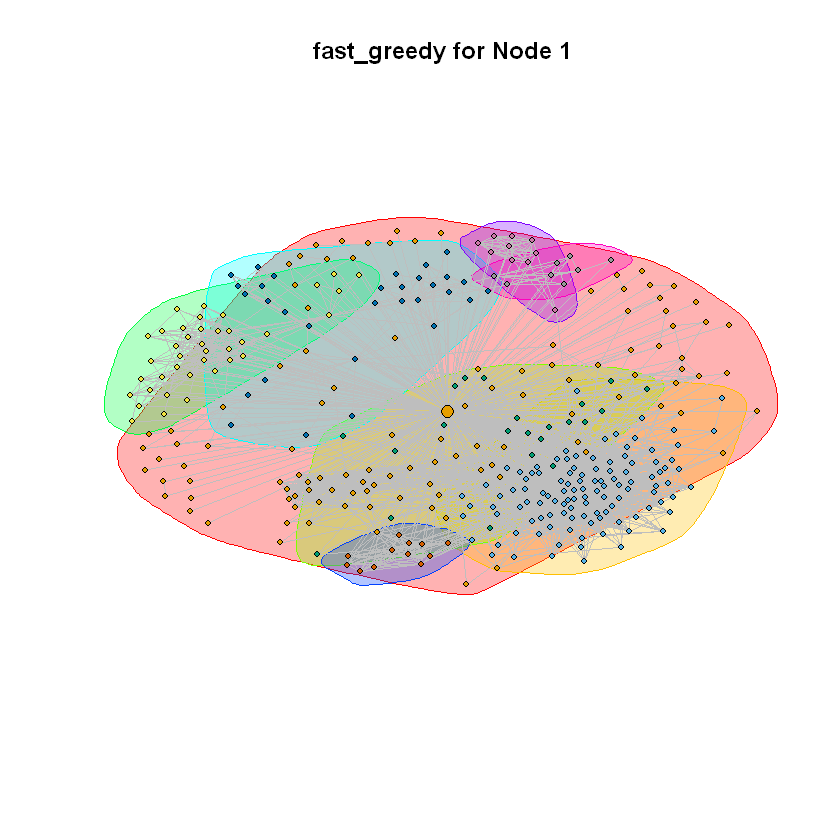

modularity(infomap) : 0.3891185 
sizes(infomap) : 142 32 21 21 16 13 10 10 11 10 9 8 7 5 6 5 3 3 2 2 2 2 2 2 2 2 


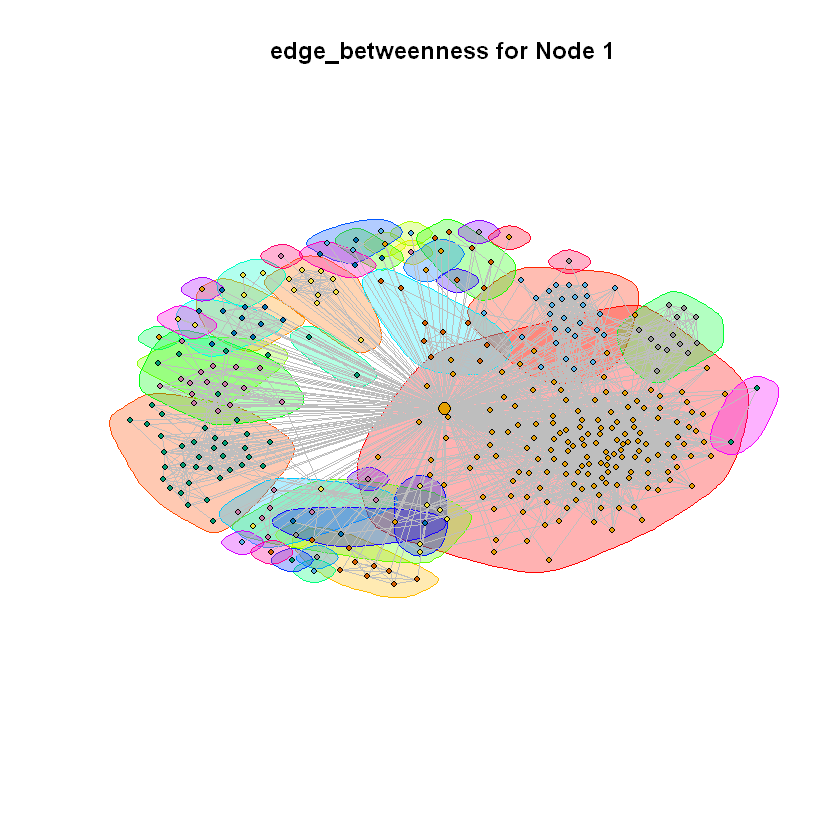

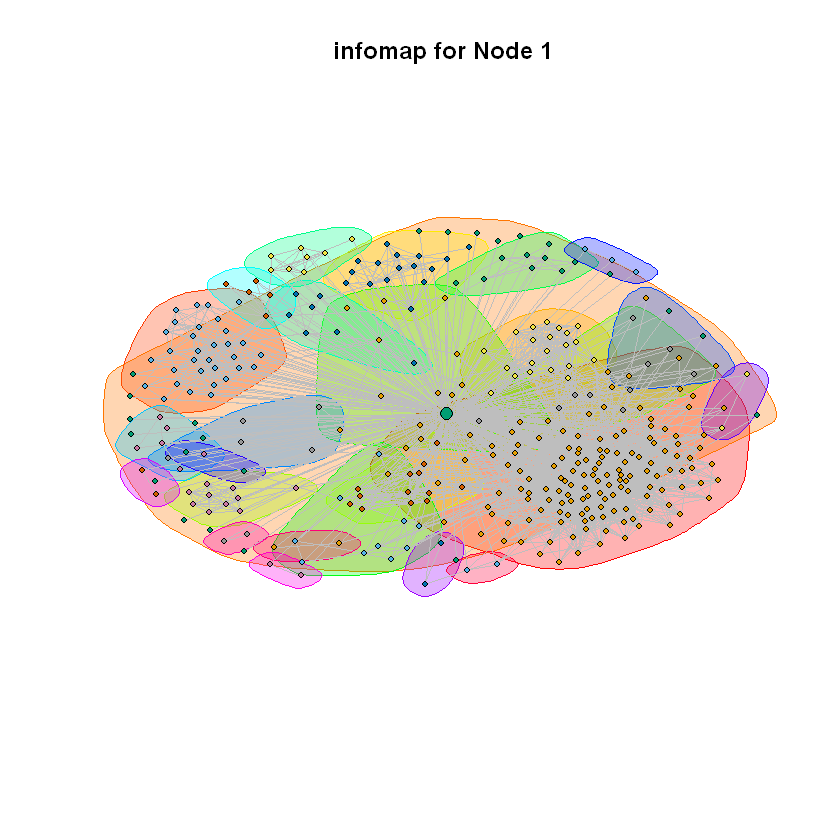

In [27]:
core=neighborhood(g,order=1,nodes=1)
personal=induced.subgraph(g,unlist(core))
personal$names=sort(unlist(core))
plot_fast(personal,TRUE,1)
plot_edge(personal,TRUE,1)
plot_info(personal,TRUE,1)

modularity(fast_greedy) : 0.4359294 
sizes(fast_greedy) : 464 484 70 9 5 3 6 2 3 
modularity(edge_betweenness) : 0.5067549 
sizes(edge_betweenness) : 7 173 127 139 366 3 71 38 2 12 7 1 1 13 6 23 6 1 3 2 1 5 1 1 1 1 2 6 1 1 1 1 2 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 


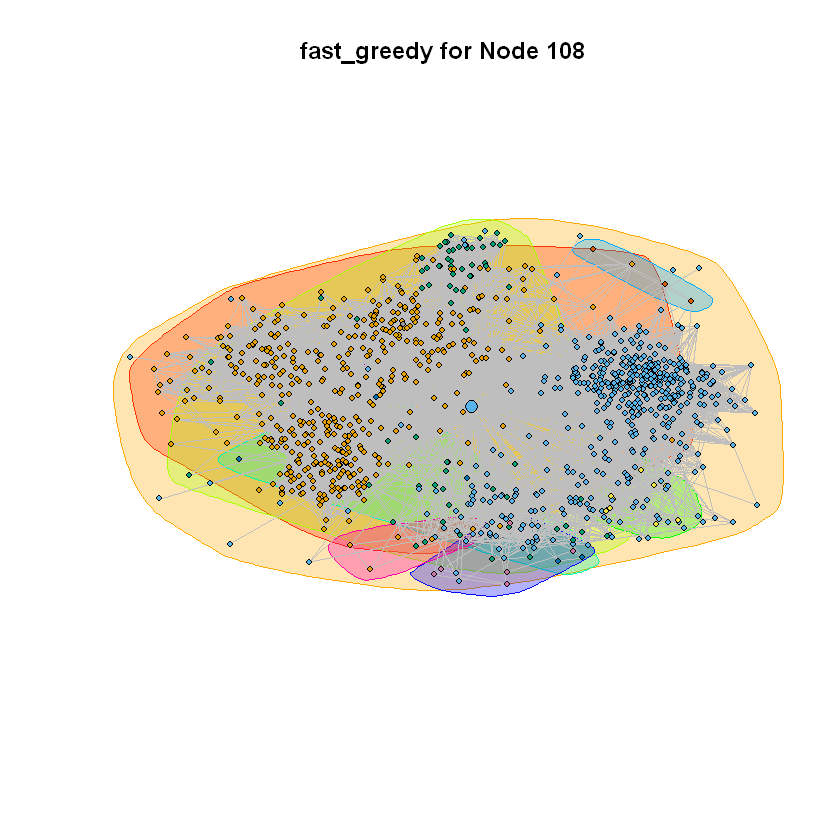

modularity(infomap) : 0.5082492 
sizes(infomap) : 323 127 93 102 71 74 47 38 28 29 18 16 12 11 9 6 6 5 6 6 3 3 3 3 3 2 2 


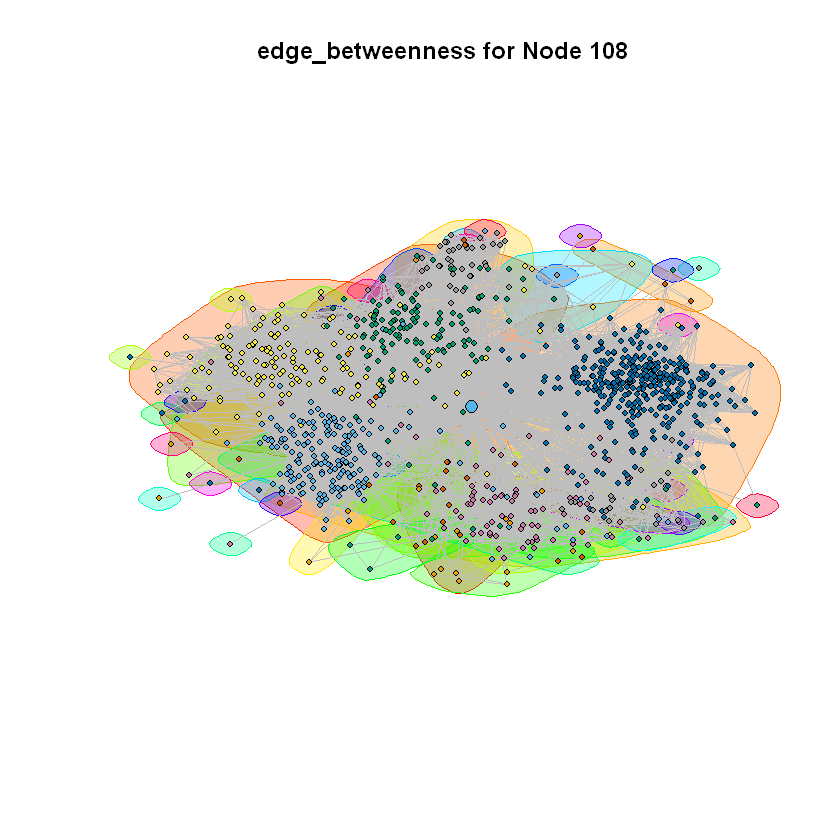

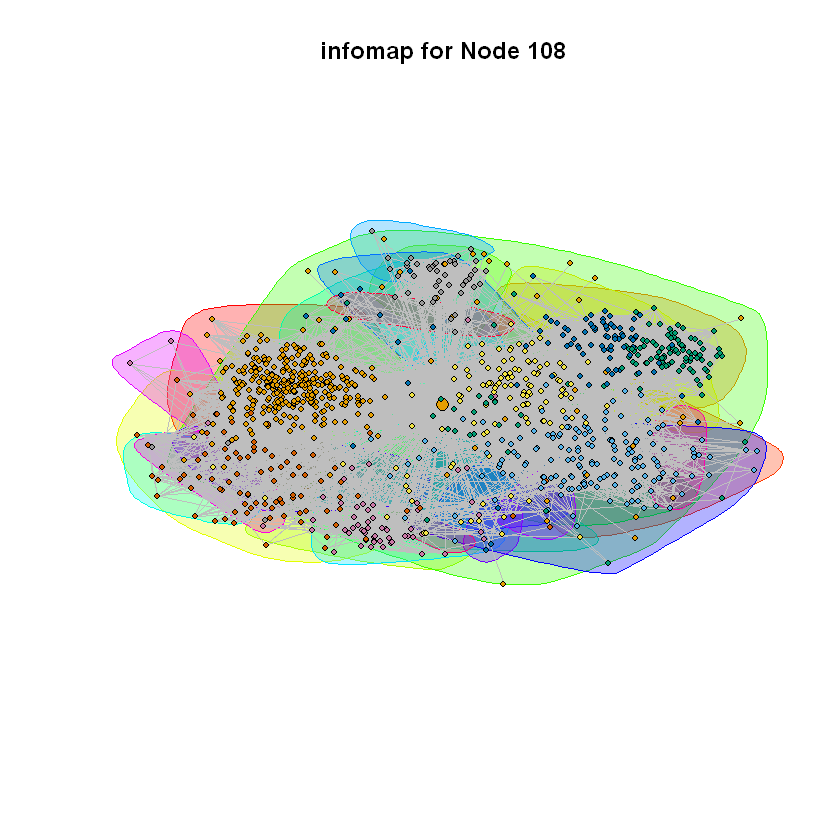

In [30]:
core=neighborhood(g,order=1,nodes=108)
personal=induced.subgraph(g,unlist(core))
personal$names=sort(unlist(core))
plot_fast(personal,TRUE,108)
plot_edge(personal,TRUE,108)
plot_info(personal,TRUE,108)


modularity(fast_greedy) : 0.2517149 
sizes(fast_greedy) : 107 11 98 4 10 
modularity(edge_betweenness) : 0.133528 
sizes(edge_betweenness) : 2 1 10 86 1 1 1 1 1 2 18 1 1 1 1 1 1 1 1 1 2 1 1 3 1 2 1 1 1 1 1 7 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 


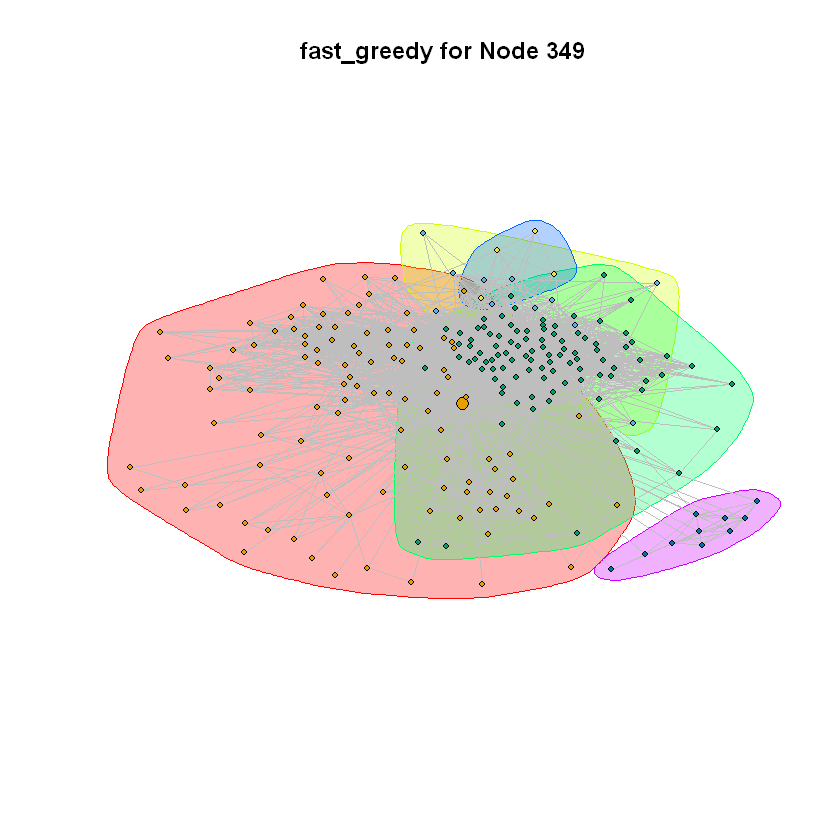

modularity(infomap) : 0.203753 
sizes(infomap) : 134 23 20 18 10 11 7 3 2 2 


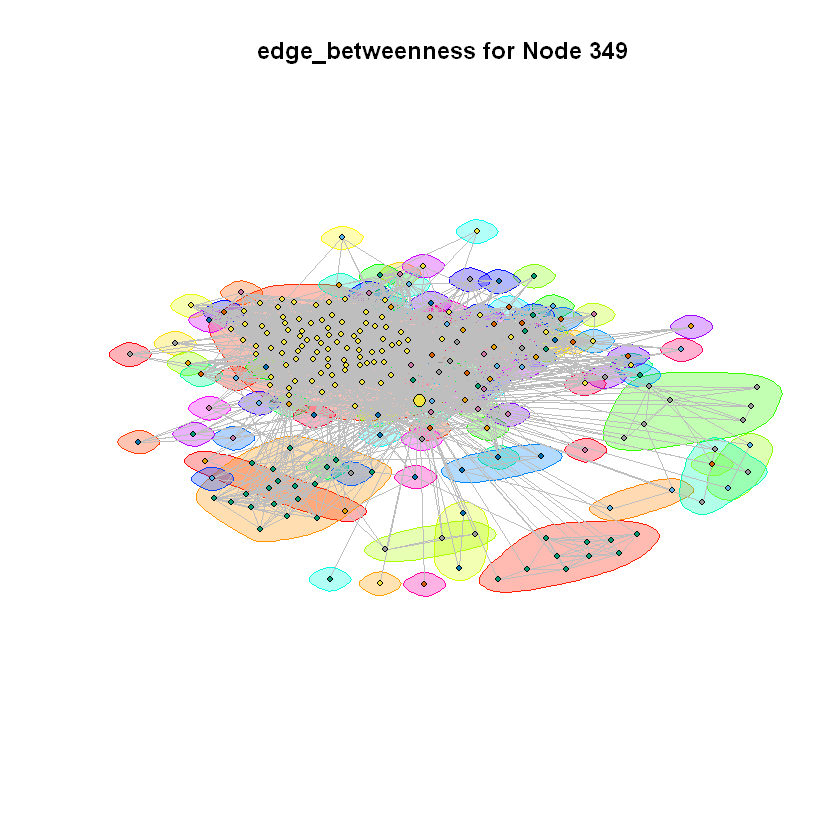

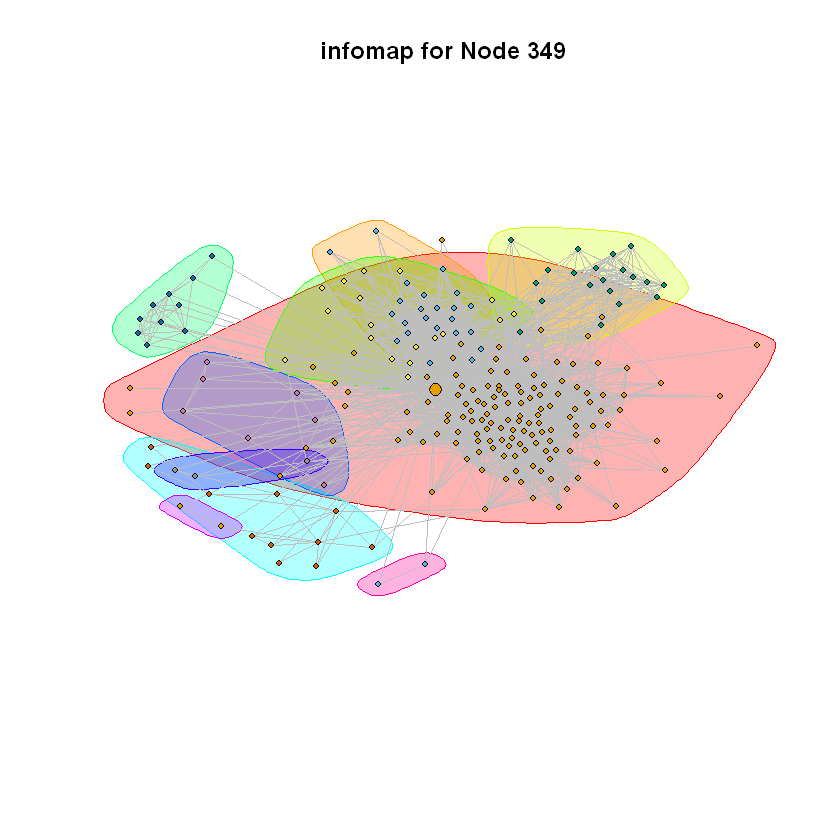

In [31]:
core=neighborhood(g,order=1,nodes=349)
personal=induced.subgraph(g,unlist(core))
personal$names=sort(unlist(core))
plot_fast(personal,TRUE,349)
plot_edge(personal,TRUE,349)
plot_info(personal,TRUE,349)

modularity(fast_greedy) : 0.5070016 
sizes(fast_greedy) : 71 72 89 
modularity(edge_betweenness) : 0.4890952 
sizes(edge_betweenness) : 77 79 1 1 1 69 1 1 1 1 


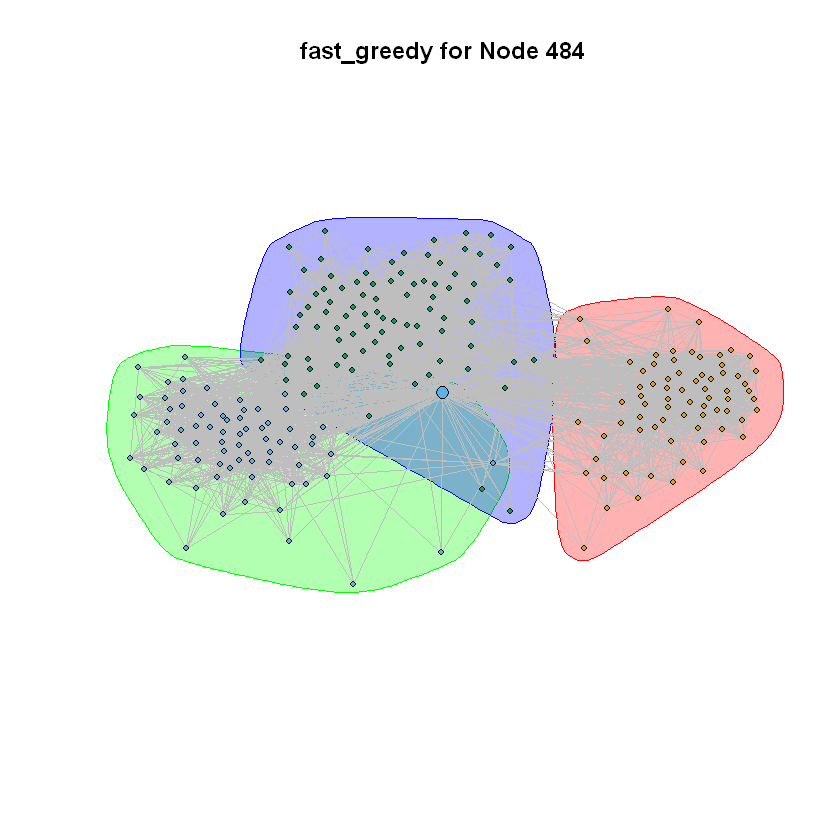

modularity(infomap) : 0.5152788 
sizes(infomap) : 85 73 70 4 


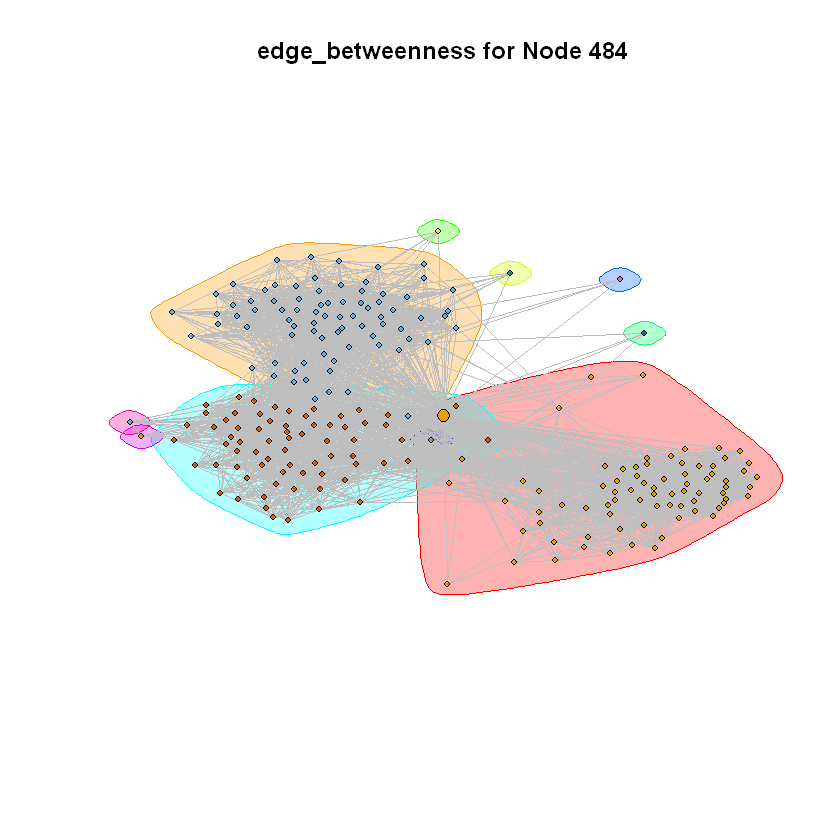

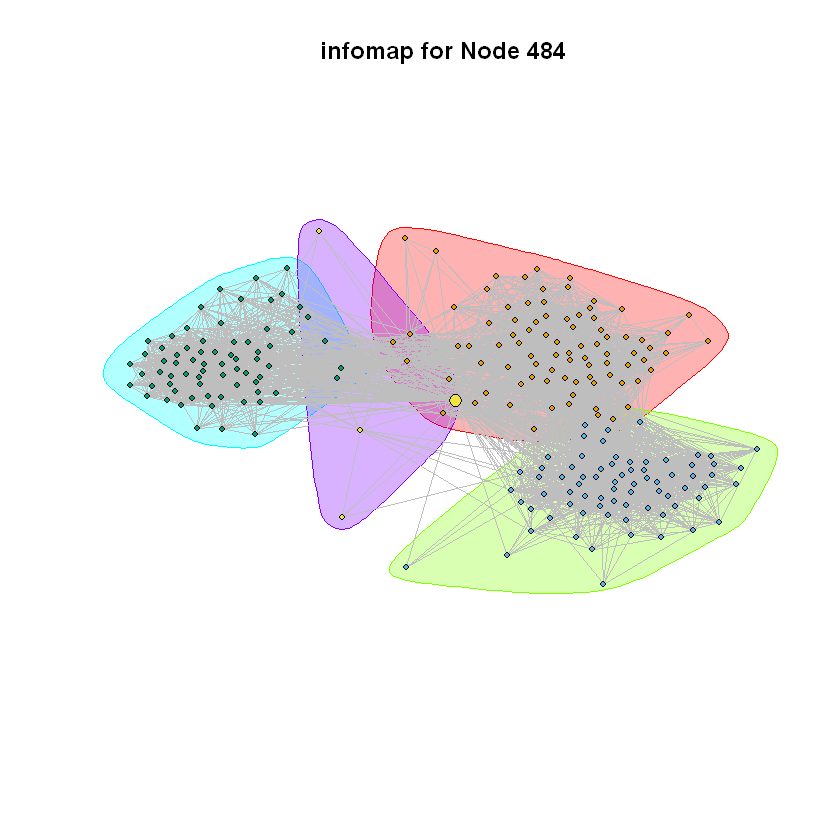

In [32]:
core=neighborhood(g,order=1,nodes=484)
personal=induced.subgraph(g,unlist(core))
personal$names=sort(unlist(core))
plot_fast(personal,TRUE,484)
plot_edge(personal,TRUE,484)
plot_info(personal,TRUE,484)

modularity(fast_greedy) : 0.1455315 
sizes(fast_greedy) : 81 125 
modularity(edge_betweenness) : 0.02762377 
sizes(edge_betweenness) : 173 18 8 1 1 2 1 1 1 


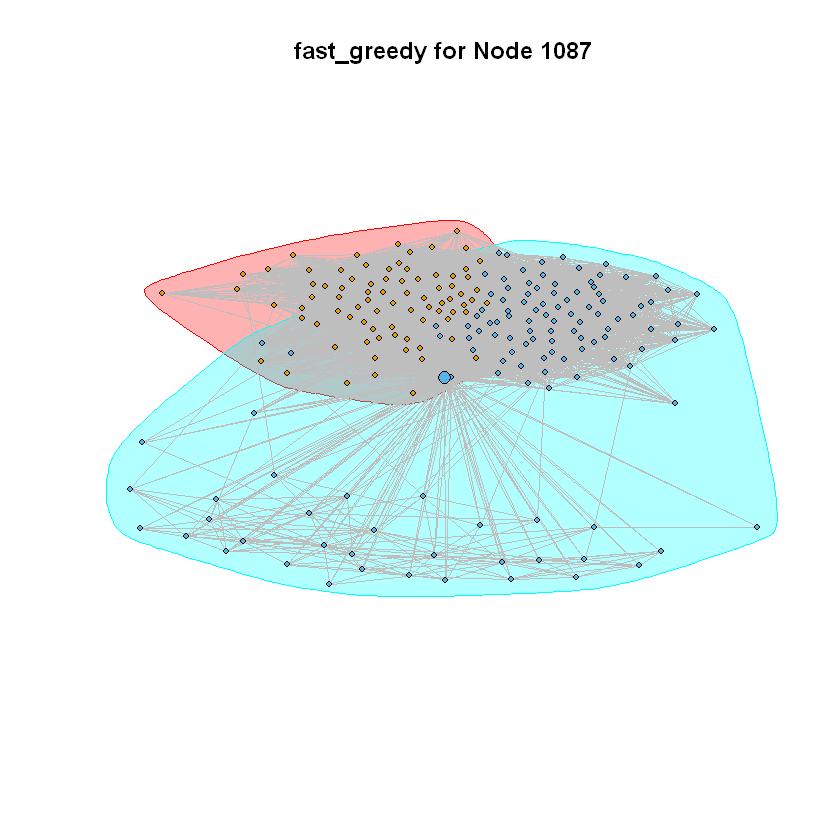

modularity(infomap) : 0.02690662 
sizes(infomap) : 175 13 11 7 


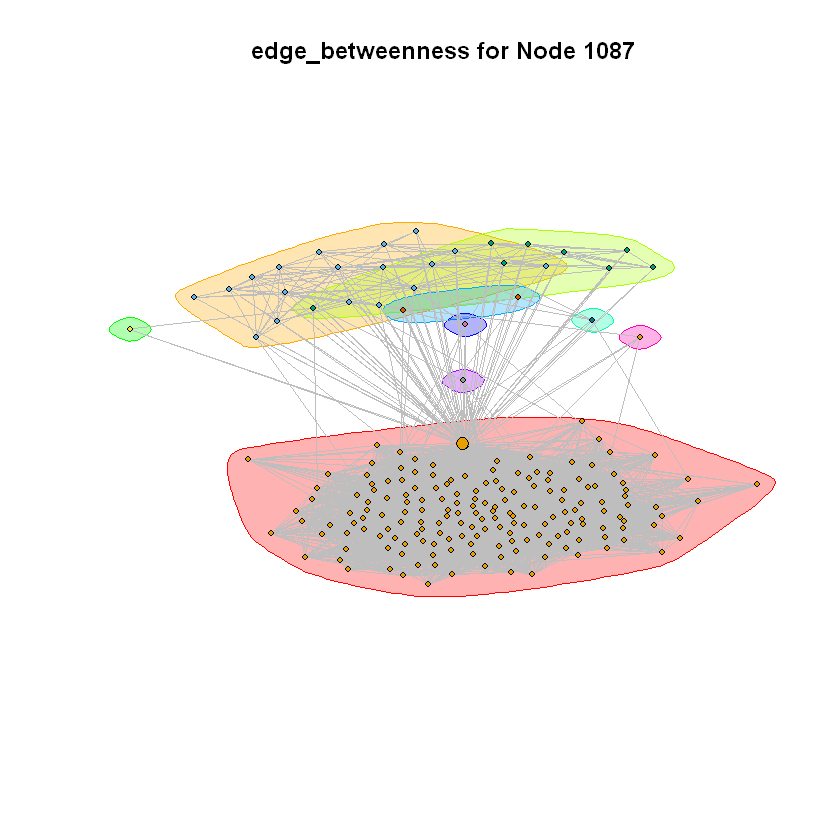

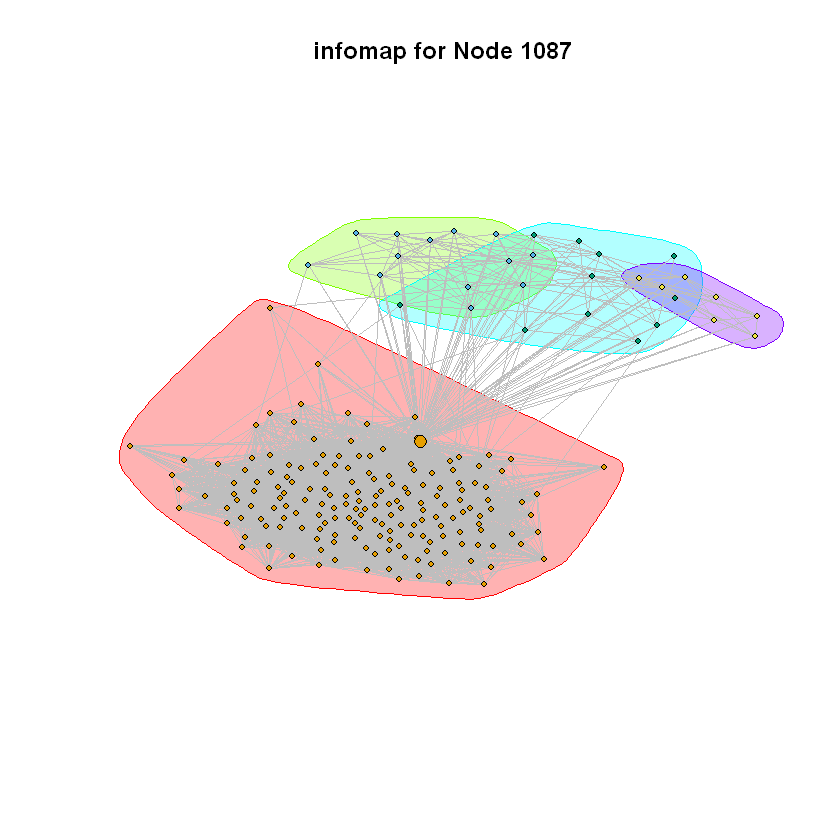

In [33]:
core=neighborhood(g,order=1,nodes=1087)
personal=induced.subgraph(g,unlist(core))
personal$names=sort(unlist(core))
plot_fast(personal,TRUE,1087)
plot_edge(personal,TRUE,1087)
plot_info(personal,TRUE,1087)

modularity(fast_greedy) : 0.4418533 
sizes(fast_greedy) : 52 39 121 18 52 24 10 8 3 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 
modularity(edge_betweenness) : 0.4161461 
sizes(edge_betweenness) : 27 39 140 10 8 9 1 1 1 1 22 1 2 5 13 1 1 2 6 3 1 5 7 7 1 2 3 1 2 1 1 1 1 1 2 1 1 1 1 2 2 1 2 1 1 1 1 1 1 1 


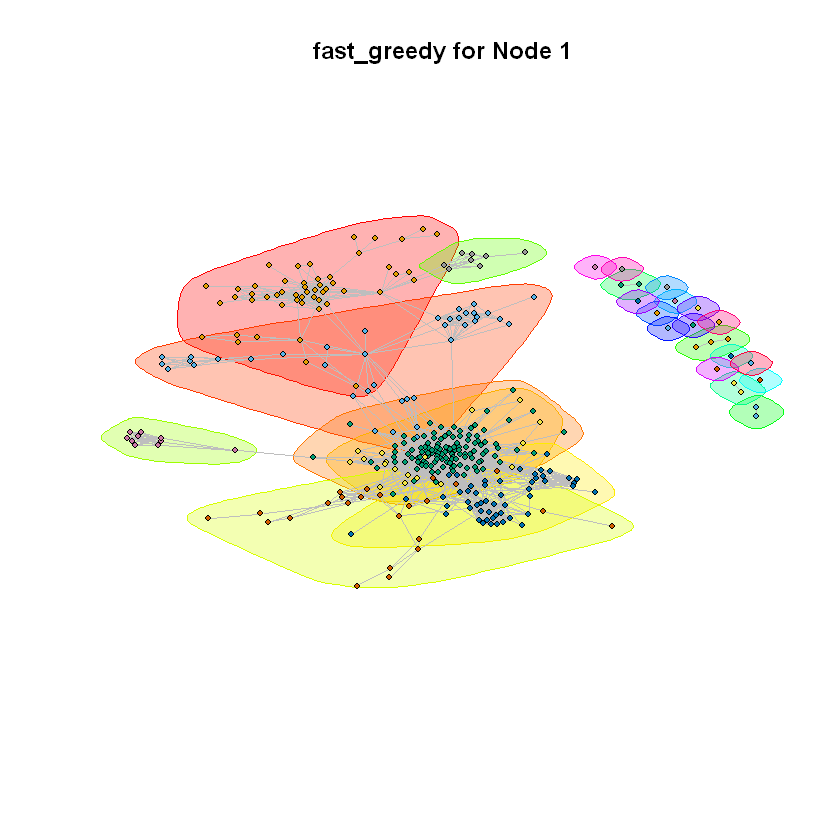

modularity(infomap) : 0.4180077 
sizes(infomap) : 143 34 21 16 13 10 9 8 11 10 9 7 6 5 5 3 2 2 2 3 3 3 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 


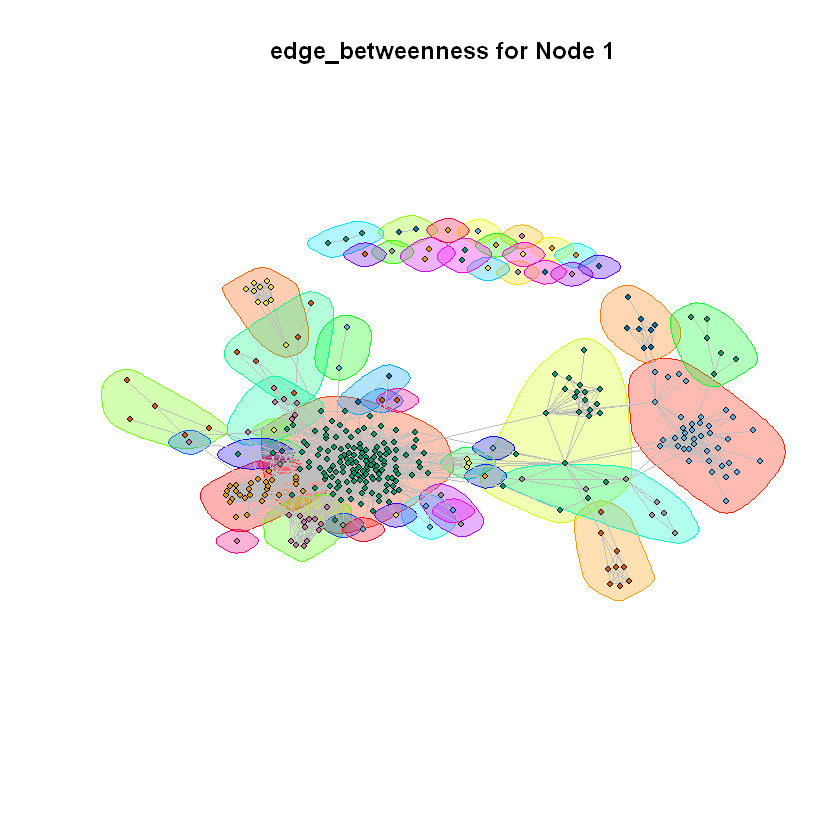

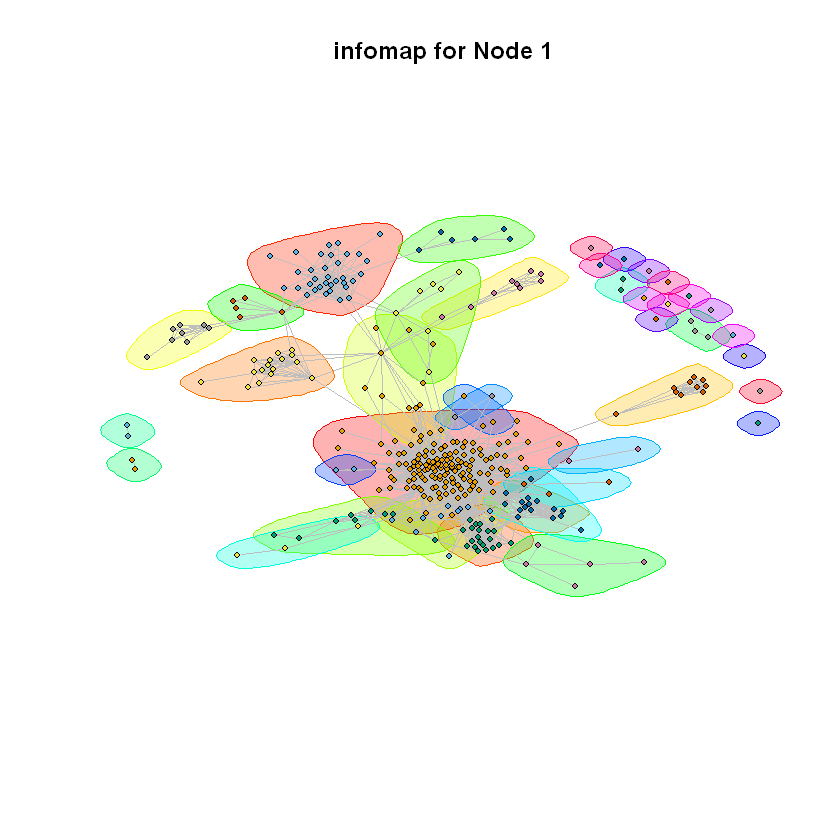

In [7]:
#question10
core=neighborhood(g,order=1,nodes=1)
temp= unlist(core)[(unlist(core) != 1)]
personal= induced.subgraph(g, vids = temp)
plot_fast(personal,FALSE,1)
plot_edge(personal,FALSE,1)
plot_info(personal,FALSE,1)

modularity(fast_greedy) : 0.4581271 
sizes(fast_greedy) : 458 465 70 19 4 3 6 2 2 3 2 1 1 1 1 1 1 1 1 1 1 1 
modularity(edge_betweenness) : 0.5213216 
sizes(edge_betweenness) : 9 137 138 360 171 3 64 38 2 12 7 1 1 13 4 3 10 6 3 14 2 1 5 4 1 1 1 1 2 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 


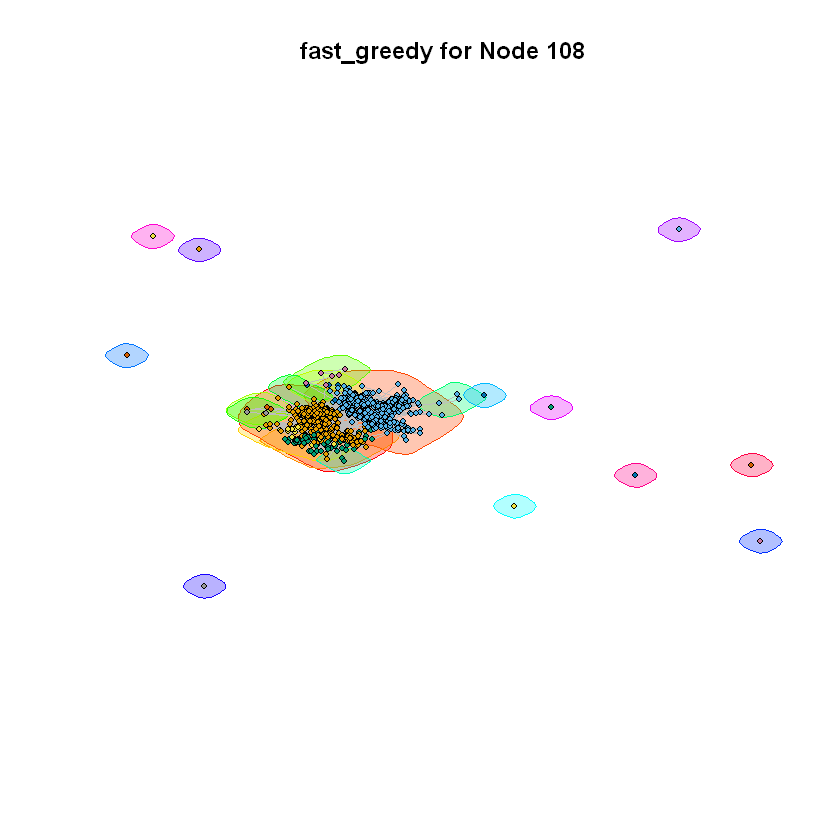

modularity(infomap) : 0.5201497 
sizes(infomap) : 325 128 95 101 71 71 48 38 27 17 16 12 11 10 6 6 6 5 6 4 4 5 6 4 3 3 2 2 2 1 1 1 1 1 1 1 1 1 1 1 


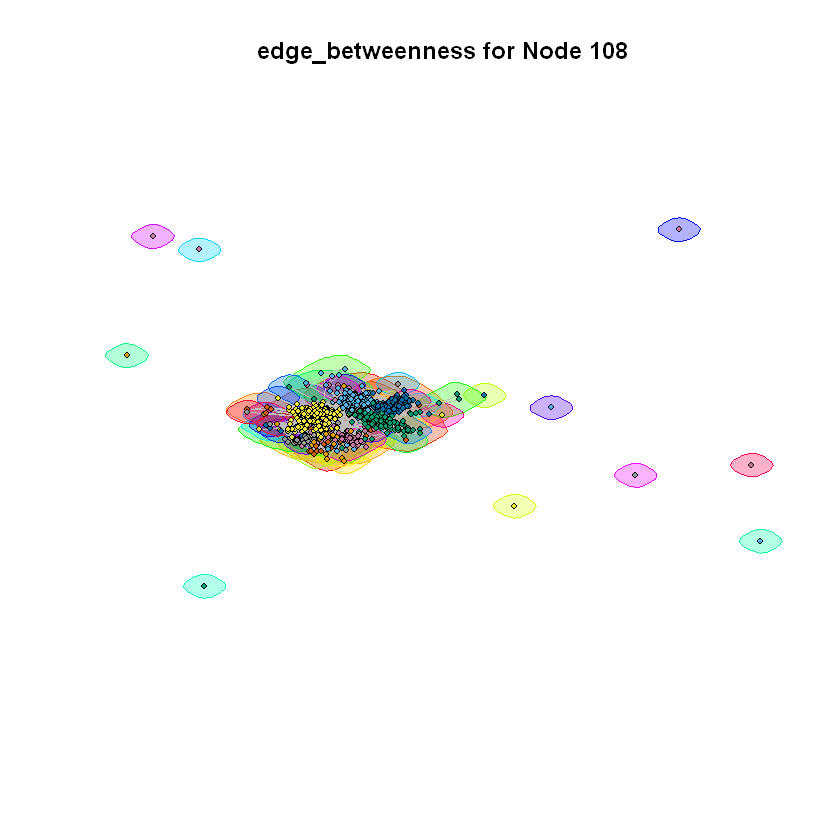

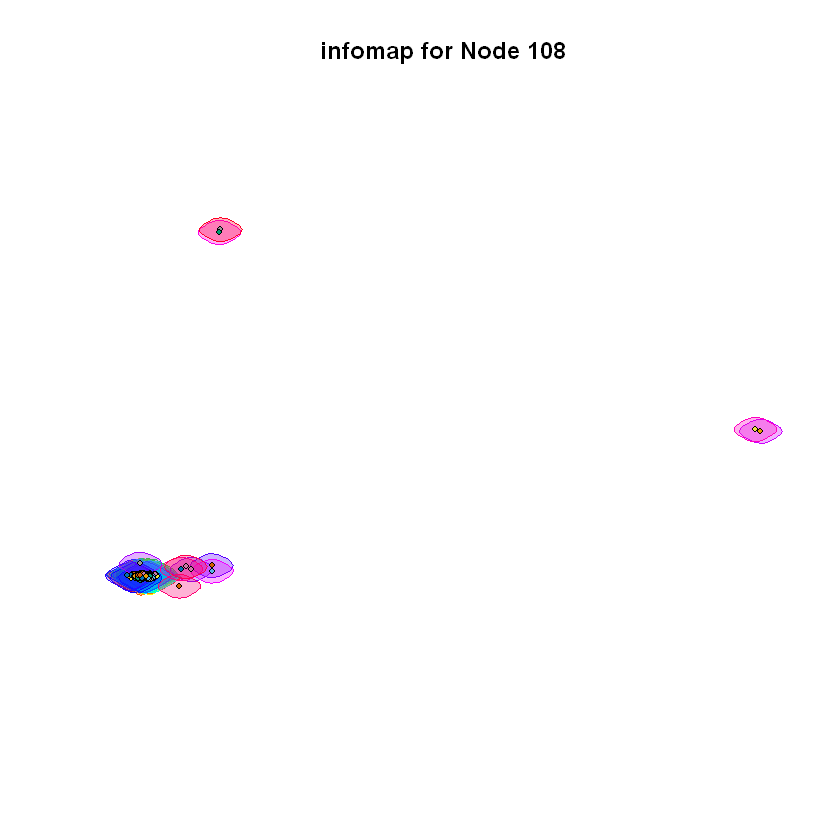

In [21]:
core=neighborhood(g,order=1,nodes=108)
temp= unlist(core)[(unlist(core) != 108)]
personal= induced.subgraph(g, vids = temp)
plot_fast(personal,FALSE,108)
plot_edge(personal,FALSE,108)
plot_info(personal,FALSE,108)

modularity(fast_greedy) : 0.2456918 
sizes(fast_greedy) : 27 80 107 10 2 1 1 1 
modularity(edge_betweenness) : 0.1505663 
sizes(edge_betweenness) : 2 1 10 2 1 1 85 1 1 2 18 1 1 1 1 1 1 1 1 1 2 1 1 3 1 2 1 1 1 1 1 7 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 


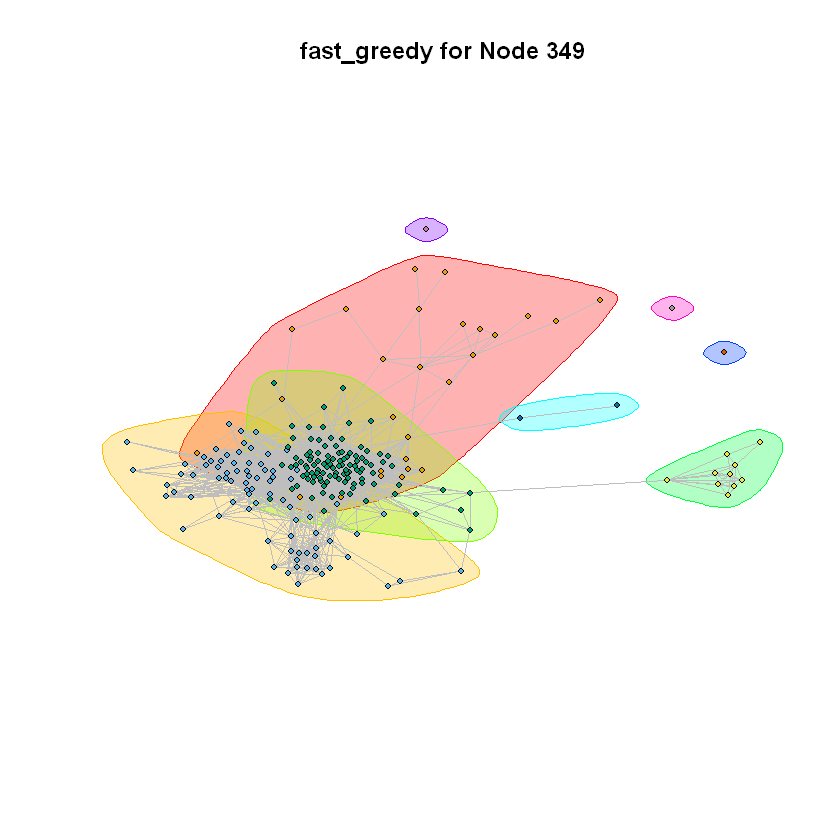

modularity(infomap) : 0.2448156 
sizes(infomap) : 117 29 20 15 10 11 7 6 4 3 2 2 1 1 1 


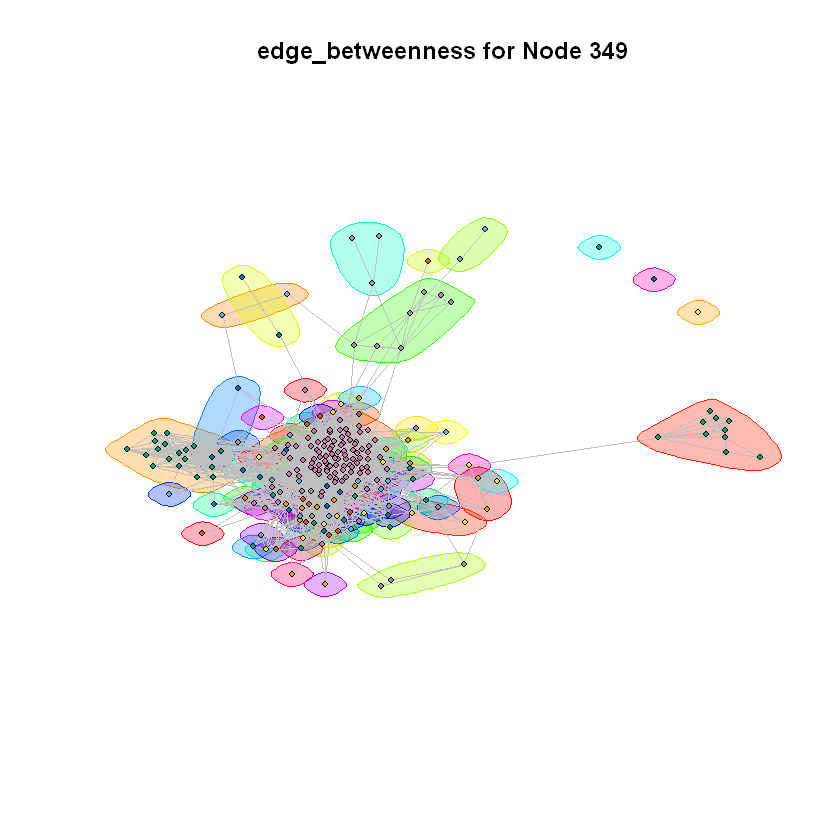

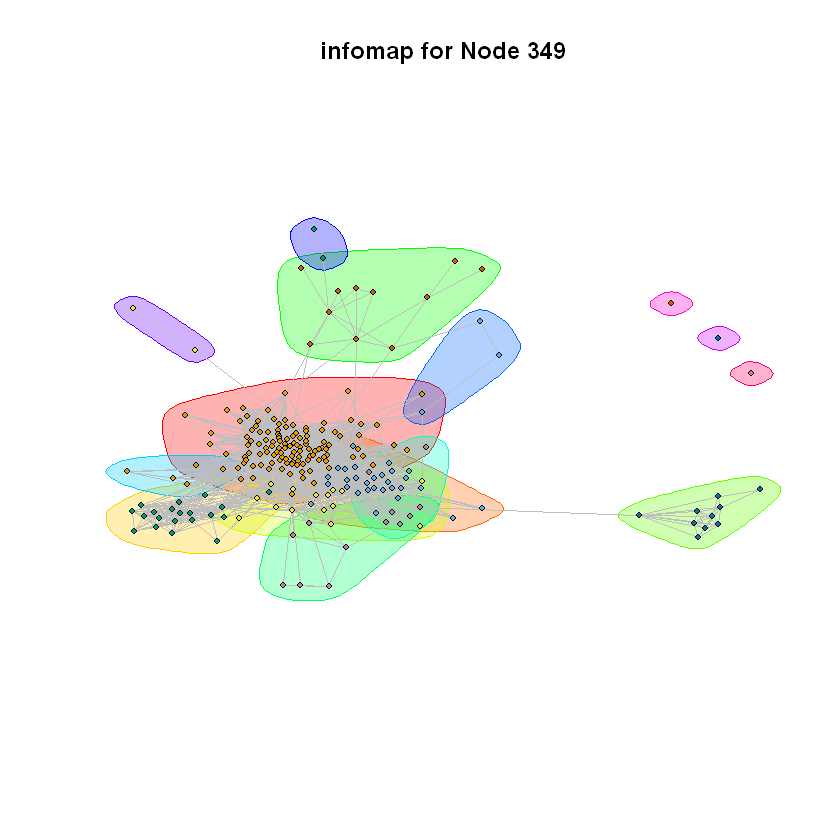

In [8]:
core=neighborhood(g,order=1,nodes=349)
temp= unlist(core)[(unlist(core) != 349)]
personal= induced.subgraph(g, vids = temp)
plot_fast(personal,FALSE,349)
plot_edge(personal,FALSE,349)
plot_info(personal,FALSE,349)

modularity(fast_greedy) : 0.5342142 
sizes(fast_greedy) : 71 71 89 
modularity(edge_betweenness) : 0.5154413 
sizes(edge_betweenness) : 74 79 1 1 1 69 1 1 2 1 1 


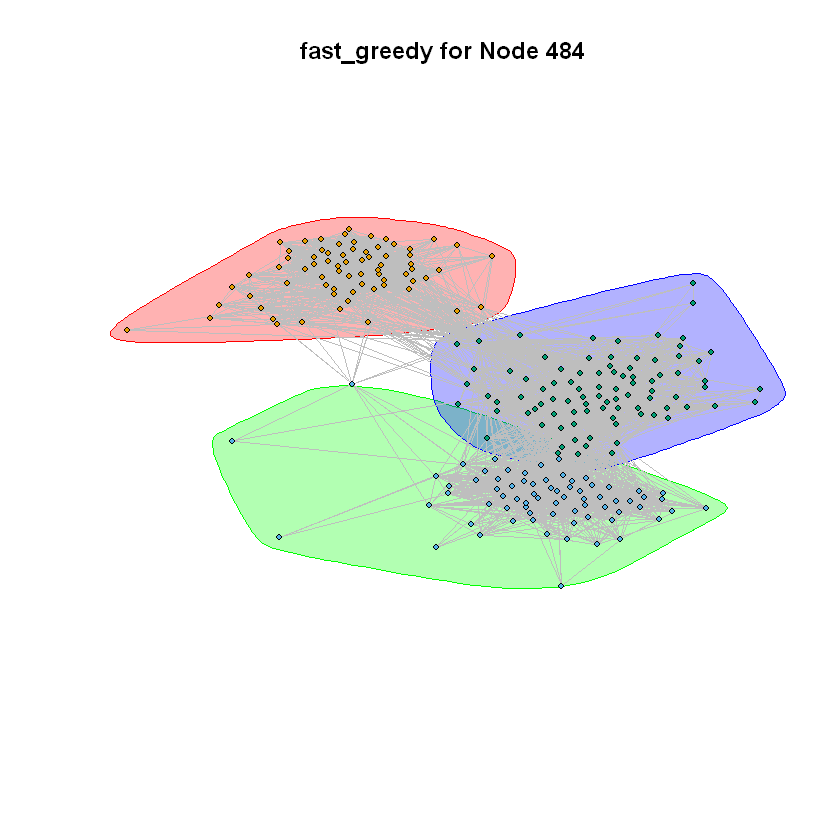

modularity(infomap) : 0.5434437 
sizes(infomap) : 85 73 71 2 


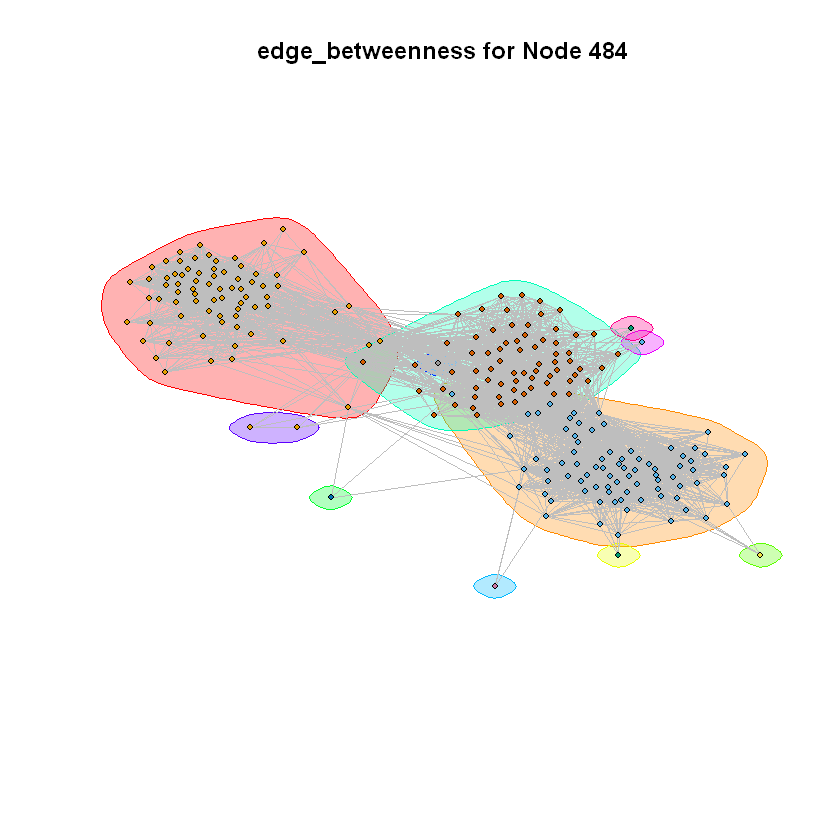

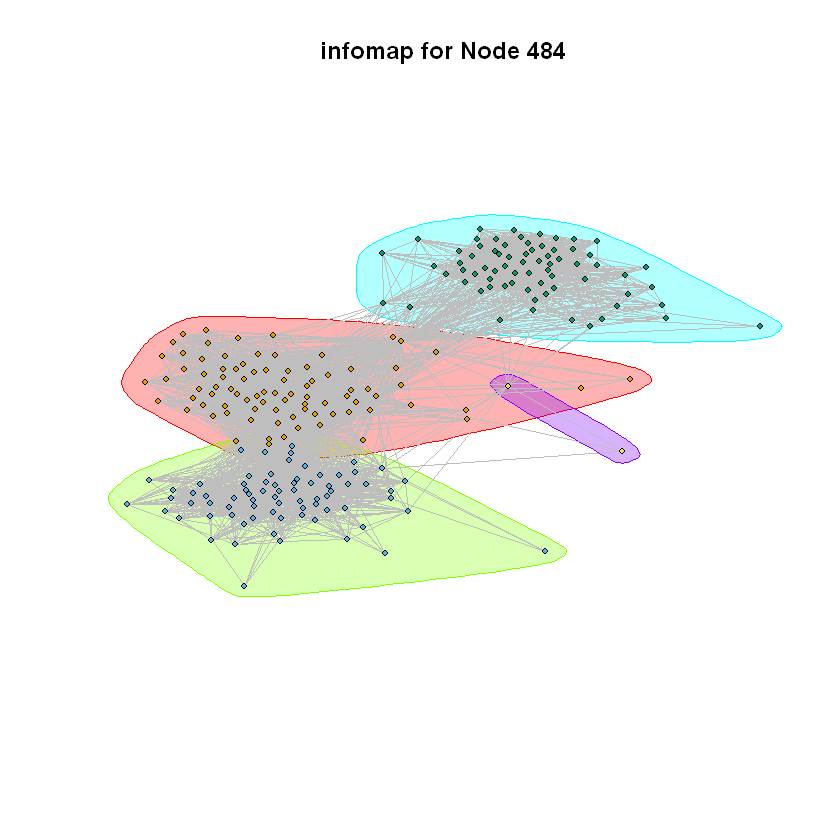

In [9]:
core=neighborhood(g,order=1,nodes=484)
temp= unlist(core)[(unlist(core) != 484)]
personal= induced.subgraph(g, vids = temp)
plot_fast(personal,FALSE,484)
plot_edge(personal,FALSE,484)
plot_info(personal,FALSE,484)

modularity(fast_greedy) : 0.1481956 
sizes(fast_greedy) : 80 125 
modularity(edge_betweenness) : 0.0324953 
sizes(edge_betweenness) : 172 31 1 1 


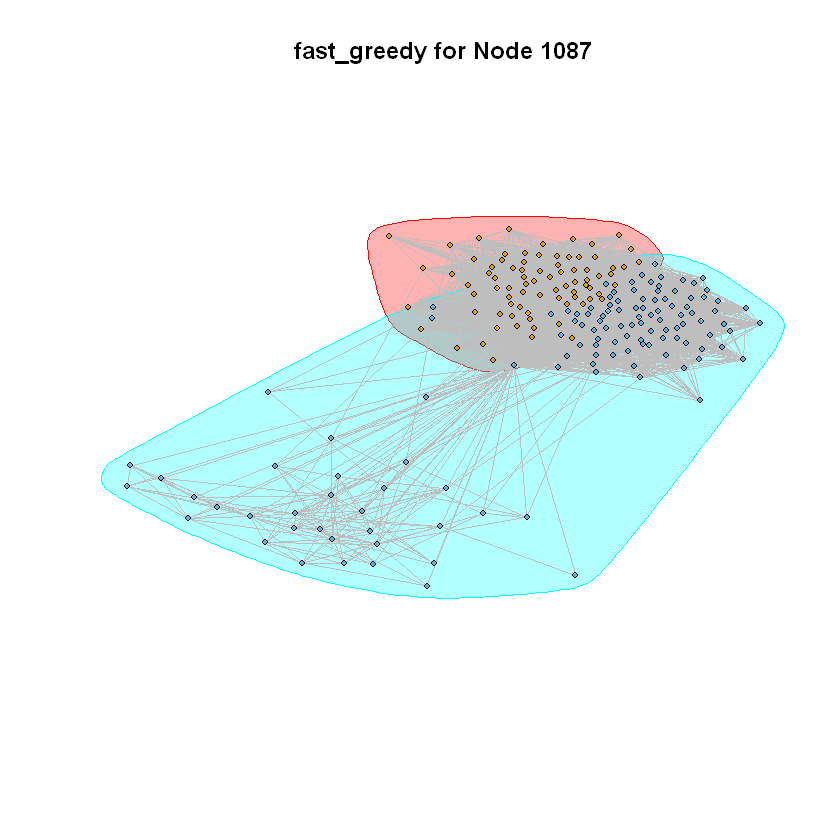

modularity(infomap) : 0.02737159 
sizes(infomap) : 174 12 10 7 2 


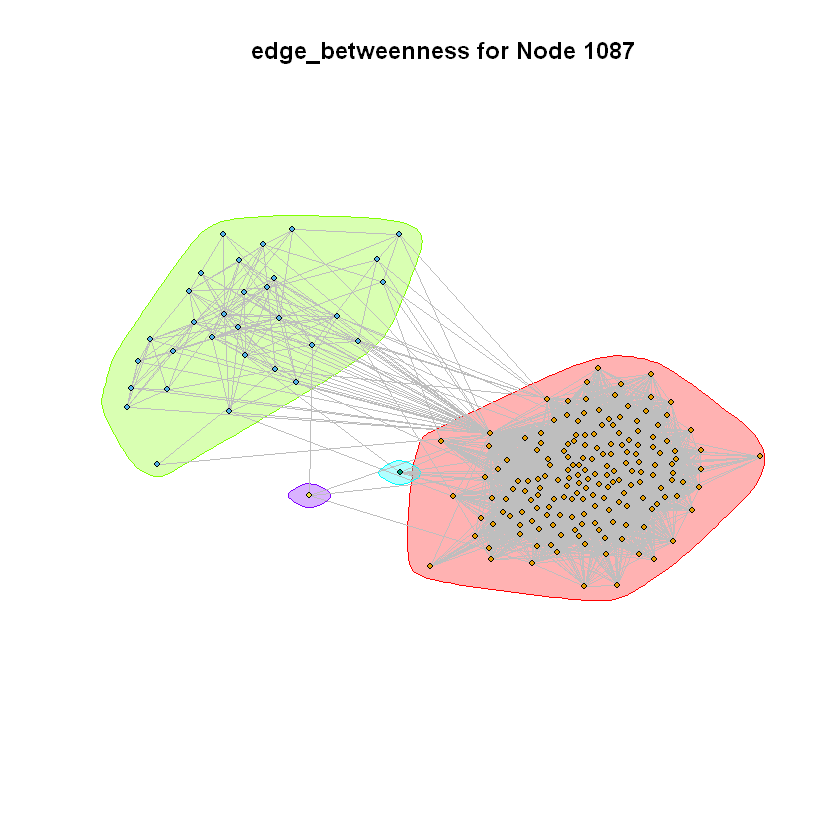

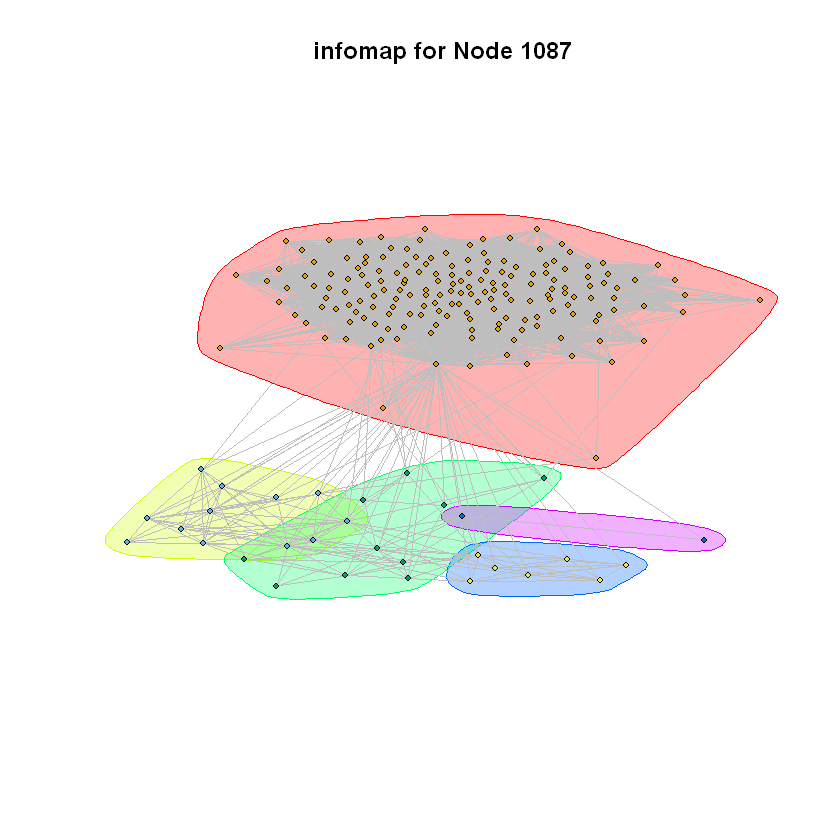

In [10]:
core=neighborhood(g,order=1,nodes=1087)
temp= unlist(core)[(unlist(core) != 1087)]
personal= induced.subgraph(g, vids = temp)
plot_fast(personal,FALSE,1087)
plot_edge(personal,FALSE,1087)
plot_info(personal,FALSE,1087)

In [16]:
personal_network=function(network,core){
    core_network=neighborhood(network, order=1, nodes=core)
    personal=induced.subgraph(network,unlist(core_network))
    personal$names=sort(unlist(core_network))
    return (personal)
}

mutual_friends = function(network, i ,j){
    neighbor_i = neighbors(network,i)
    neighbor_j = neighbors(network,j)
    mutual_friends=intersect(neighbor_i, neighbor_j)
    return ( mutual_friends)
}

embeddness_f = function(network, i ,j){
    return (length(mutual_friends(network,i,j)))
}

dispersion_f = function(network, i ,j){
    mutual=mutual_friends(network,i,j)
    dispersion_sub=delete.vertices(network,c(which(network$names==i),which(network$names==j)))
    dispersion_sub$names=sort(intersect(which(network$names!=i),which(network$names!=j)))
    temp=numeric(0)
    if(length(mutual)<2){
        temp=c(0)
    }else{
        pairs=combn(mutual,2,FUN=NULL,simplify=TRUE)
        for(i in 1:(length(pairs)/2)){
            pair_1=pairs[,i][1]
            pair_2=pairs[,i][2]
            temp=c(temp,shortest.paths(dispersion_sub,which(dispersion_sub$names==pair_1),which(dispersion_sub$names==pair_2)))
        }
    }
    return (sum(temp))
}


Embededness Distribution, core= 1

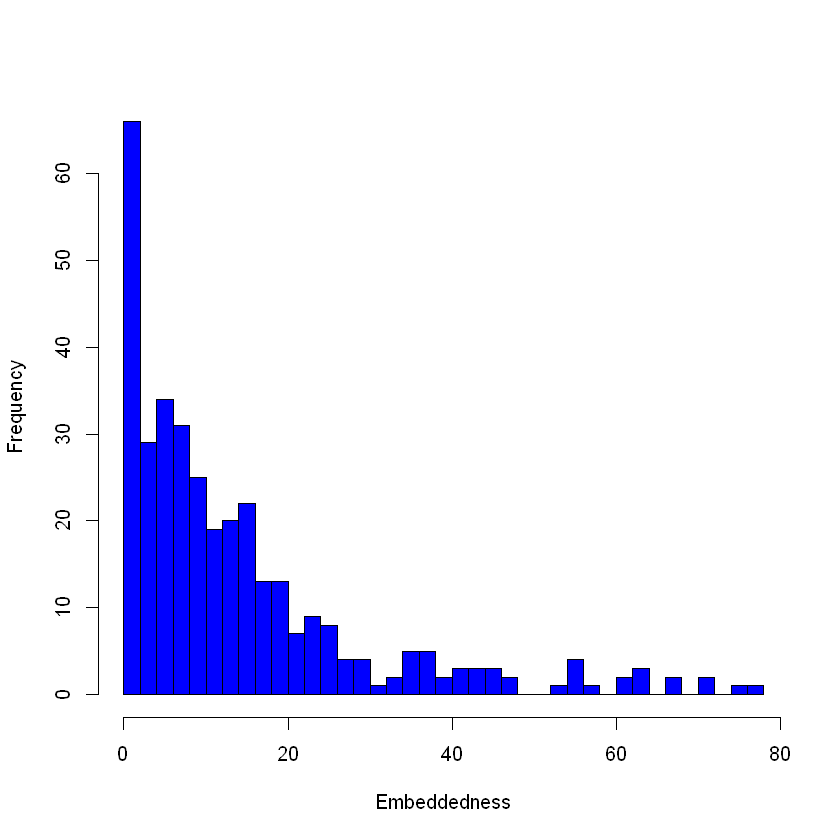

Embededness Distribution, core= 108

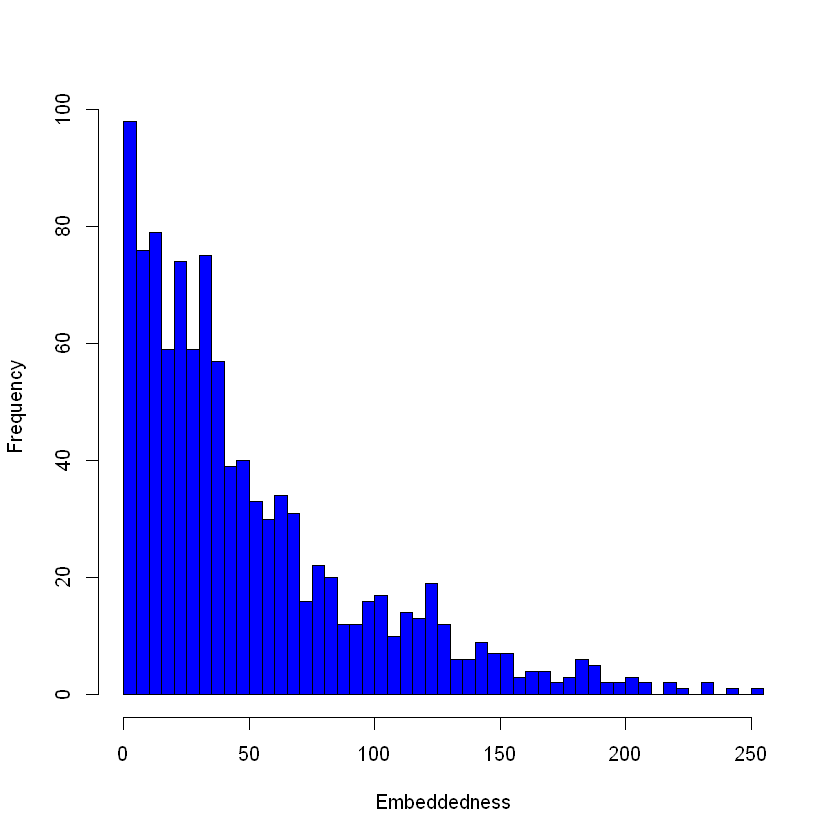

Embededness Distribution, core= 349

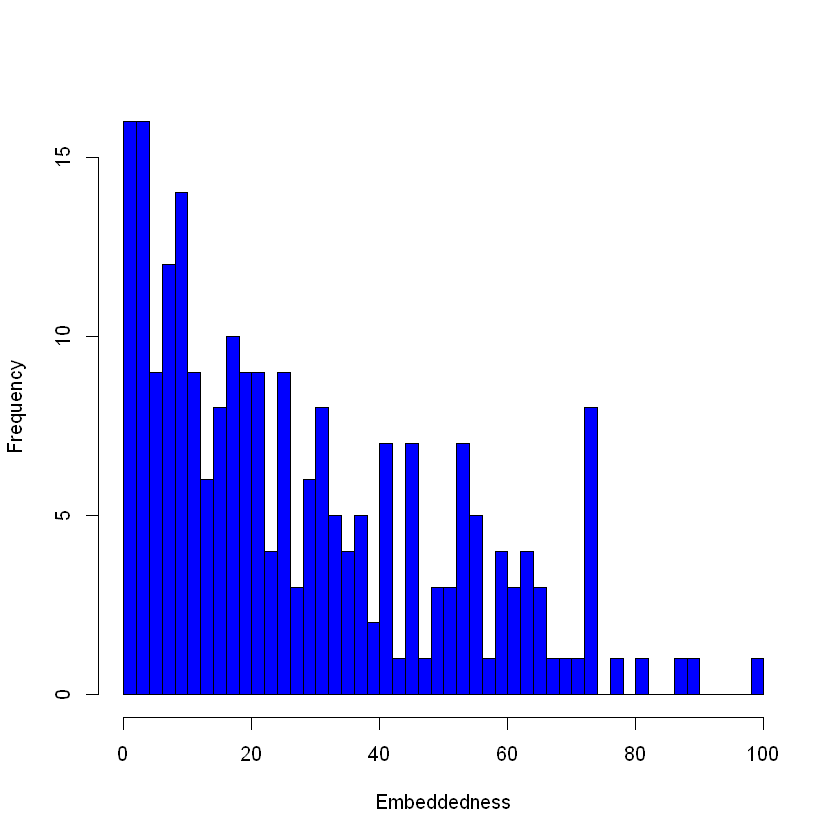

Embededness Distribution, core= 484

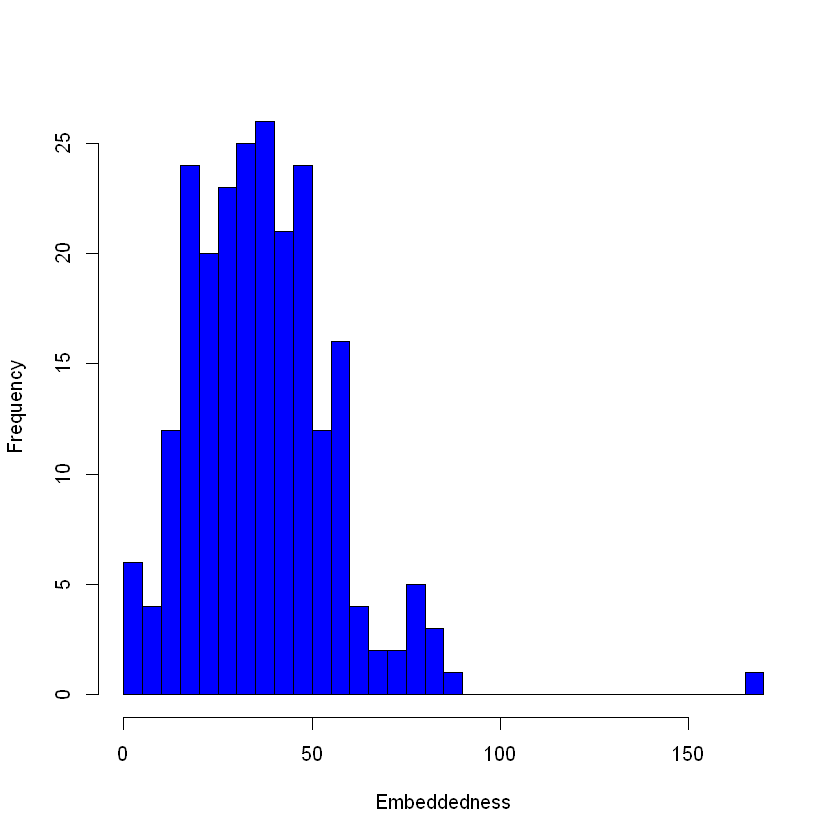

Embededness Distribution, core= 1087

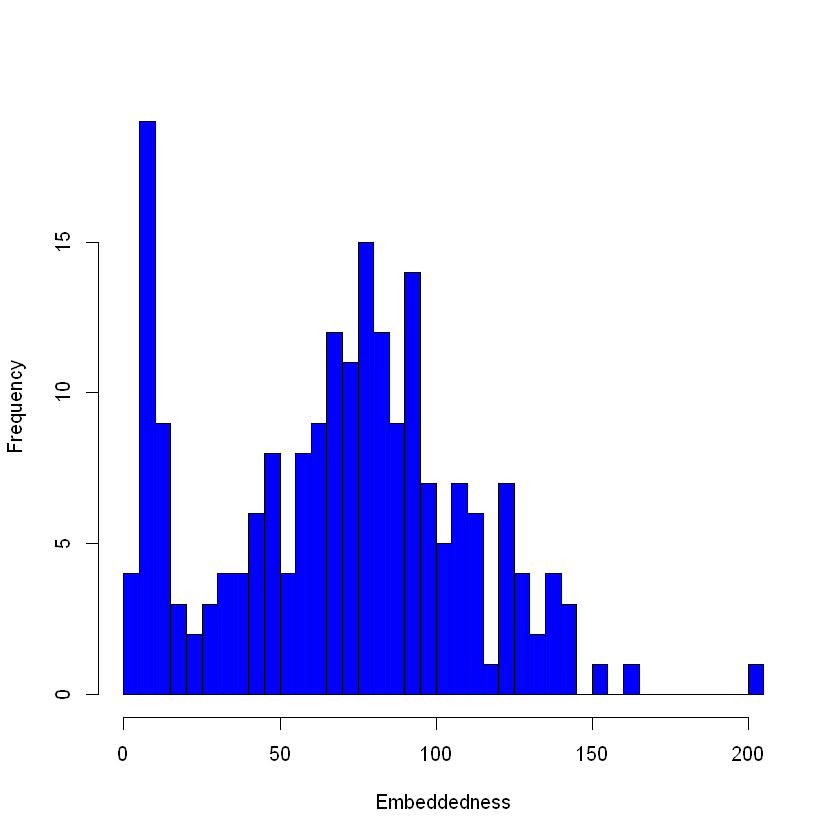

In [21]:
#question12
five_index=c(1,108,349,484,1087)
for (i in five_index){
  embeddness= numeric()
  dispersion= numeric()
  personal=personal_network(g,i)
  for( j in personal$names){
    if(j==i)
      next
    embeddness=c(embeddness,embeddness_f(g,i,j))
    #dispersion=c(dispersion,dispersion_f(g,i,j))
  }
  hist(embeddness,breaks=50, main=cat("Embededness Distribution, core=",i), xlab ="Embeddedness", col="blue")
  #hist(dispersion,breaks=50, main=cat("Dispersion Distribution",core=i), xlab ="Dispersion", col="blue")
}

In [33]:
get_personal_network=function(core, network)
{
  nn = neighborhood(network , 1 , nodes=core)[[1]]
  non_nn = which( !( (1:vcount(network)) %in% nn)  )
  personal_network = delete.vertices(network , non_nn)
  personal_network$name =  sort(nn)
  return (personal_network)
}


find_intersection =function(u,v,network)
{
    nn_u = neighborhood(network,1,u)[[1]][-1]
    nn_v = neighborhood(network,1,v)[[1]][-1]
    result = intersect(nn_u, nn_v)
    return (result)
}

cal_dispersion=function(u,v,network) 
{
    node_disp = 0
    intersection = find_intersection(u, v, network)
    temp=which(!(1:vcount(network) %in% intersection))
    modified_network = delete.vertices(network, temp)
  
    if (length(intersection) > 1)
    {
        a = distances(modified_network)
        a[is.infinite(a)] = length(modified_network)
        node_disp <- sum(a)/2
    }
    return (node_disp)
}
cal_embeddedness =function (u,v,network)
{
  emdbeddness = length(find_intersection(u,v,network))
  return (emdbeddness)
}

find_index = function(network, node)
{
  index = which(network$name == node)
  return (index)
}

get_result = function(network, core_node){
    personal_network = get_personal_network(core_node,network)
    core_index = find_index(personal_network, core_node)
    dispersion_vec = c();
    embeddedness_vec = c();
    nn <- V(personal_network)
    for(v in nn)
    {
        if(v == core_index)
          next
        embeddedness = cal_embeddedness(core_index,v,personal_network)
        dispersion = cal_dispersion(core_index,v,personal_network)
        embeddedness_vec = c(embeddedness_vec, embeddedness);
        dispersion_vec = c(dispersion_vec, dispersion);
    }
    
    result = c()
    result$embeddedness_vec = embeddedness_vec
    result$dispersion_vec = dispersion_vec
    return (result)
}

plot_distribution = function(network, core_node){
    result = get_result(network, core_node)
    dispersion_vec = result$dispersion_vec
    hist(dispersion_vec,breaks=50, main=cat("Dispersion Distribution",core=core_node), xlab ="Dispersion", col="blue")
    
}

Dispersion Distribution 1

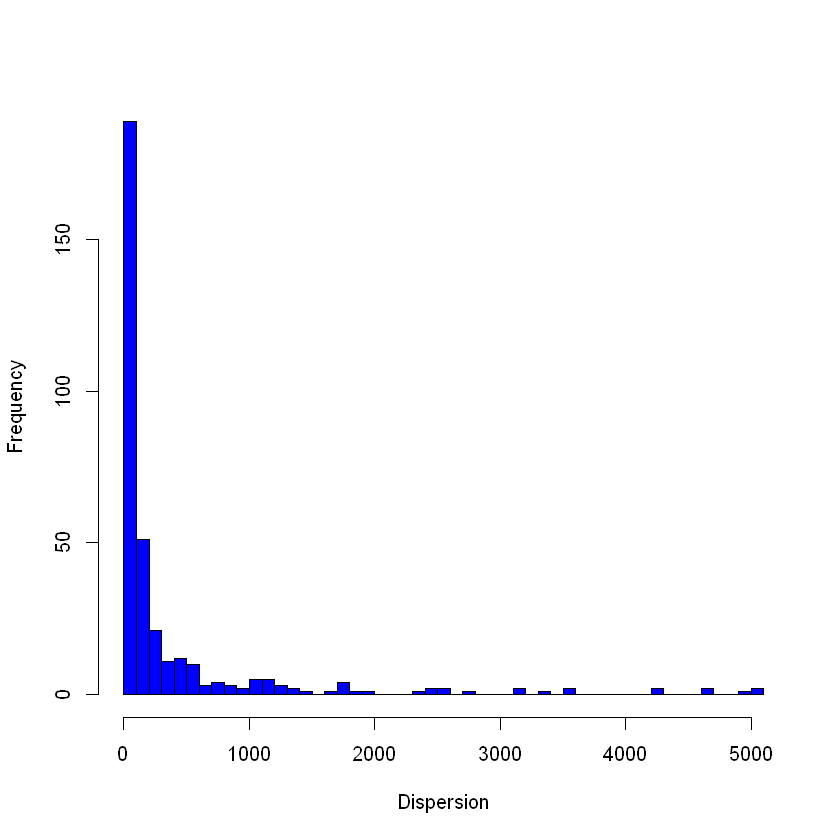

Dispersion Distribution 108

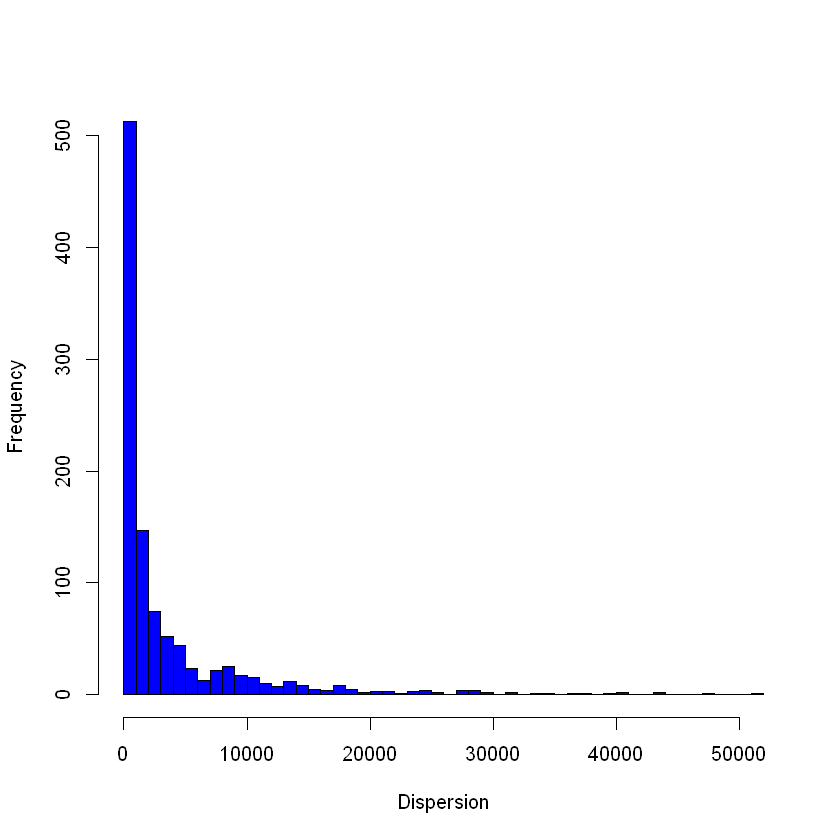

Dispersion Distribution 349

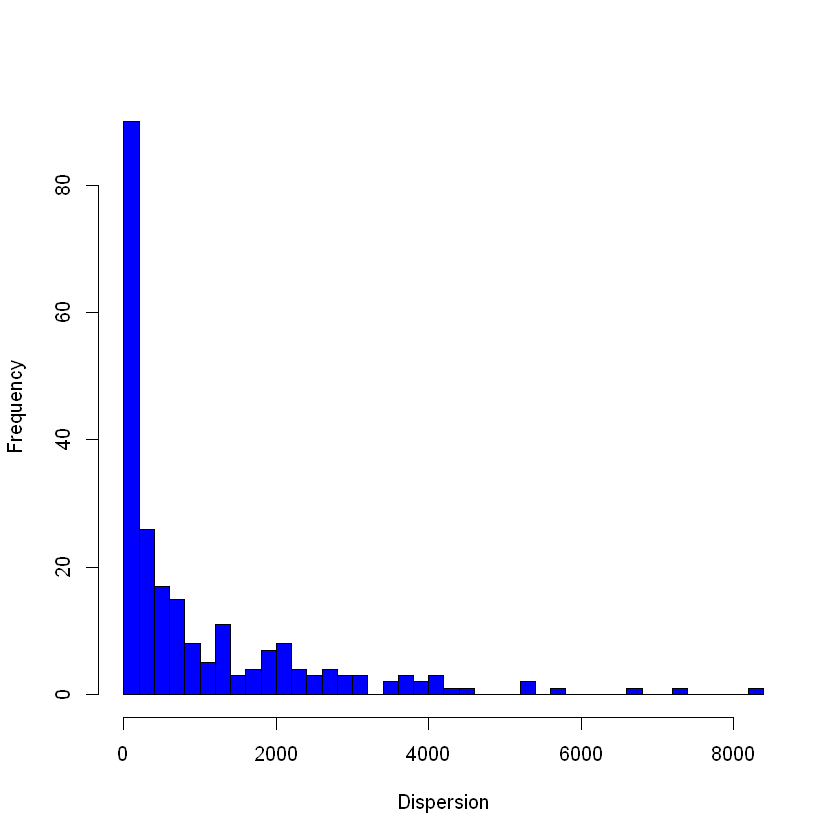

Dispersion Distribution 484

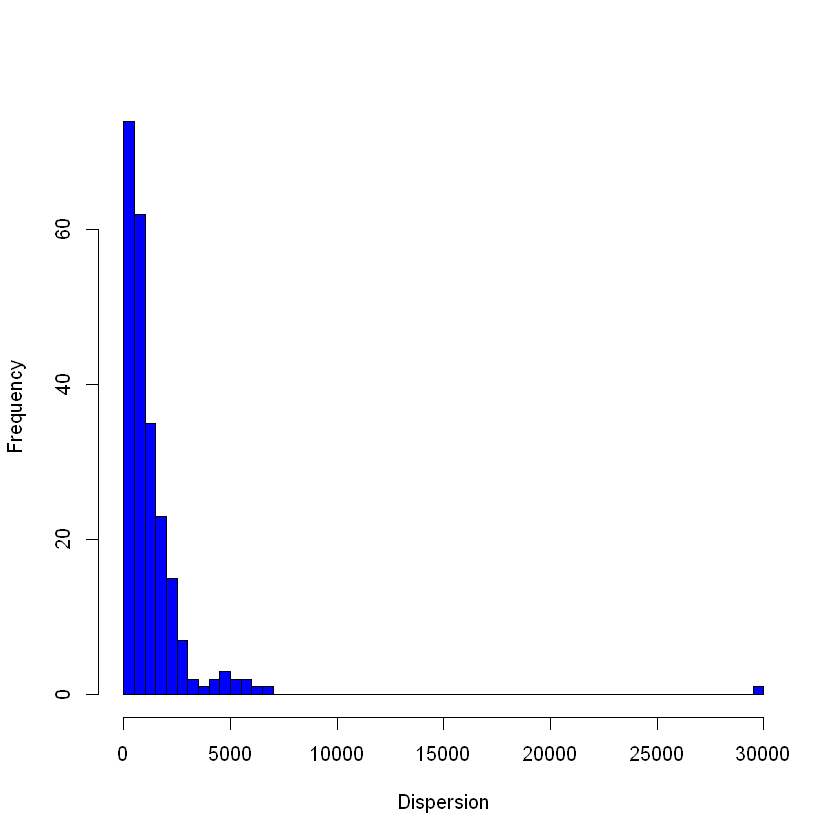

Dispersion Distribution 1087

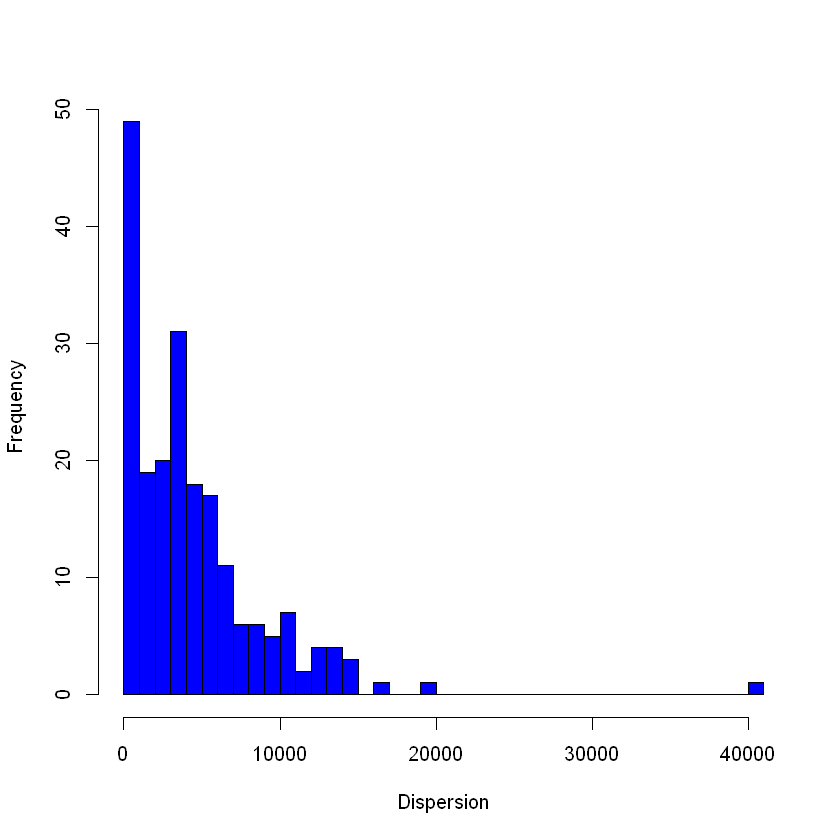

In [34]:
five_index=c(1,108,349,484,1087)
for (i in five_index){
  plot_distribution(g,i)
}

In [25]:
#question13 & 14
max_dispersion= function(network, core_node){
    result = get_result(network, core_node)
    embeddedness_vec = result$embeddedness_vec
    dispersion_vec = result$dispersion_vec
    ratio_vec = dispersion_vec/embeddedness_vec
    personal_network = get_personal_network(core_node, network)
    core_index = find_index(personal_network, core_node)
    nn = V(personal_network)
    
    max_node <- which.max(dispersion_vec)
        
    eg = fastgreedy.community(personal_network); 
    mfc = membership(eg)
    edge_set <- E(personal_network)[from(max_node)]
    V(personal_network)$color[max_node] = "red"
    V(personal_network)$color[core_index] = "blue"
    E(personal_network)$color = "light blue"
    E(personal_network)$color[edge_set] = "black"
    widEd = rep(1, length(E(personal_network)));
    plot(personal_network,vertex.size=4,vertex.label=NA,vertex.color=V(personal_network)$color,edge.width = widEd,mark.groups = by(seq_along(mfc), mfc, invisible),edge.color=E(personal_network)$color)
  
}
    
max_embeddedness= function(network, core_node){
    result = get_result(network, core_node)
    embeddedness_vec = result$embeddedness_vec
    dispersion_vec = result$dispersion_vec
    ratio_vec = dispersion_vec/embeddedness_vec
    personal_network = get_personal_network(core_node, network)
    core_index = find_index(personal_network, core_node)
    nn = V(personal_network)
    
    max_node = which.max(embeddedness_vec)
  
        
    eg = fastgreedy.community(personal_network); 
    mfc = membership(eg)
    edge_set <- E(personal_network)[from(max_node)]
    V(personal_network)$color[max_node] = "red"
    V(personal_network)$color[core_index] = "blue"
    E(personal_network)$color = "light blue"
    E(personal_network)$color[edge_set] = "black"
    widEd = rep(1, length(E(personal_network)));
    plot(personal_network,vertex.size=4,vertex.label=NA,vertex.color=V(personal_network)$color,edge.width = widEd,mark.groups = by(seq_along(mfc), mfc, invisible),edge.color=E(personal_network)$color)
  
}
    
max_disemb= function(network, core_node){
    result = get_result(network, core_node)
    embeddedness_vec = result$embeddedness_vec
    dispersion_vec = result$dispersion_vec
    ratio_vec = dispersion_vec/embeddedness_vec
    personal_network = get_personal_network(core_node, network)
    core_index = find_index(personal_network, core_node)
    nn = V(personal_network)
    
    
    max_node <- which.max(ratio_vec)
        
    eg = fastgreedy.community(personal_network); 
    mfc = membership(eg)
    edge_set <- E(personal_network)[from(max_node)]
    V(personal_network)$color[max_node] = "red"
    V(personal_network)$color[core_index] = "blue"
    E(personal_network)$color = "light blue"
    E(personal_network)$color[edge_set] = "black"
    widEd = rep(1, length(E(personal_network)));
    plot(personal_network,vertex.size=4,vertex.label=NA,vertex.color=V(personal_network)$color,edge.width = widEd,mark.groups = by(seq_along(mfc), mfc, invisible),edge.color=E(personal_network)$color)
  
}


Warning message in vattrs[[name]][index] <- value:
"number of items to replace is not a multiple of replacement length"Warning message in vattrs[[name]][index] <- value:
"number of items to replace is not a multiple of replacement length"Warning message in vattrs[[name]][index] <- value:
"number of items to replace is not a multiple of replacement length"

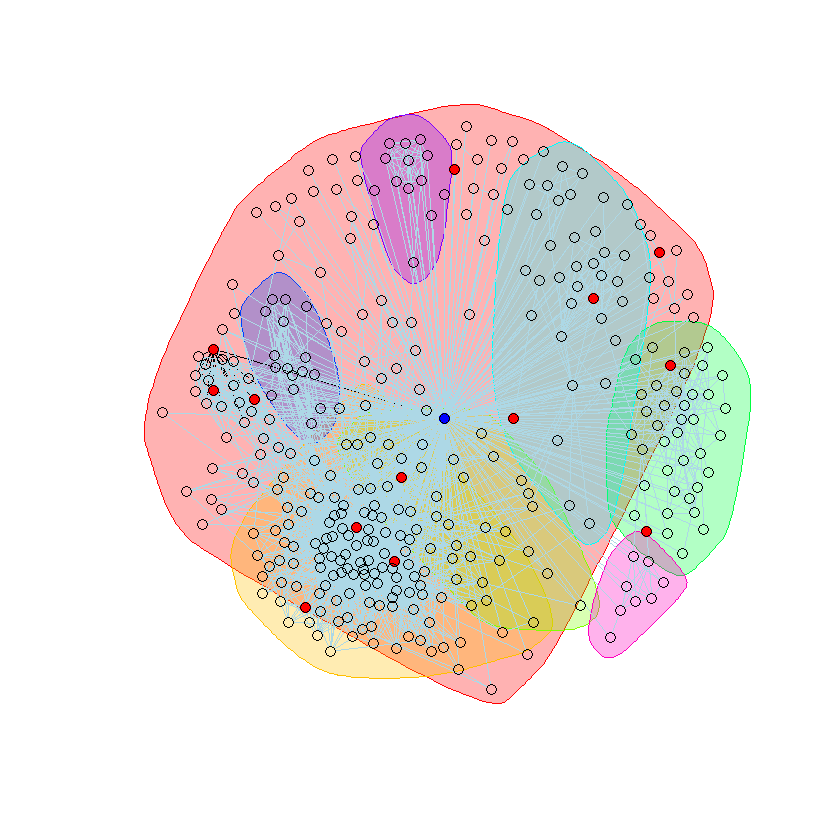

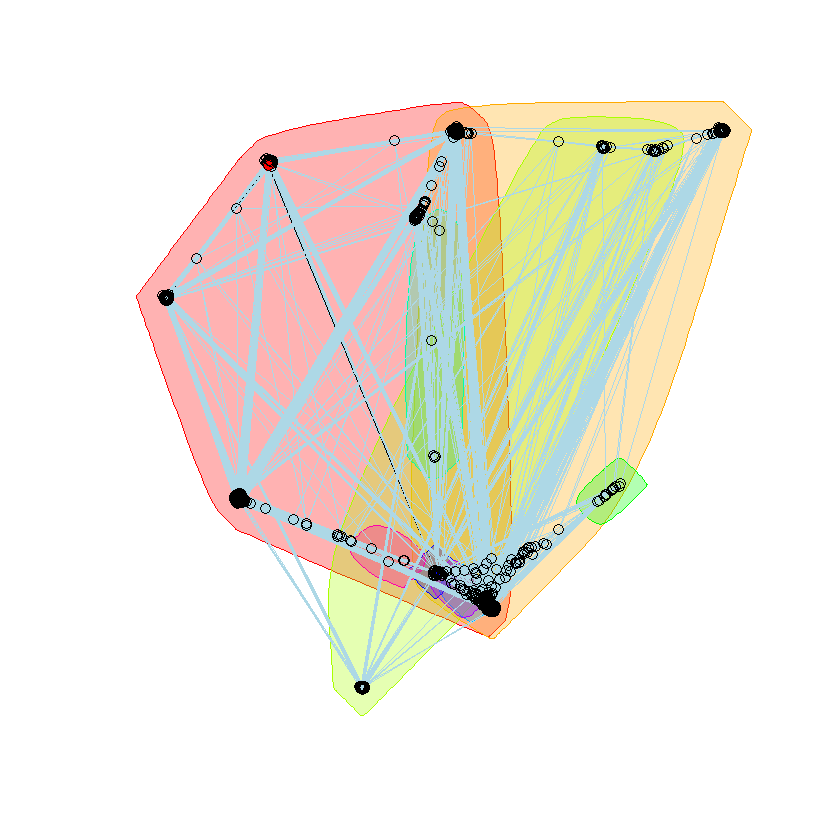

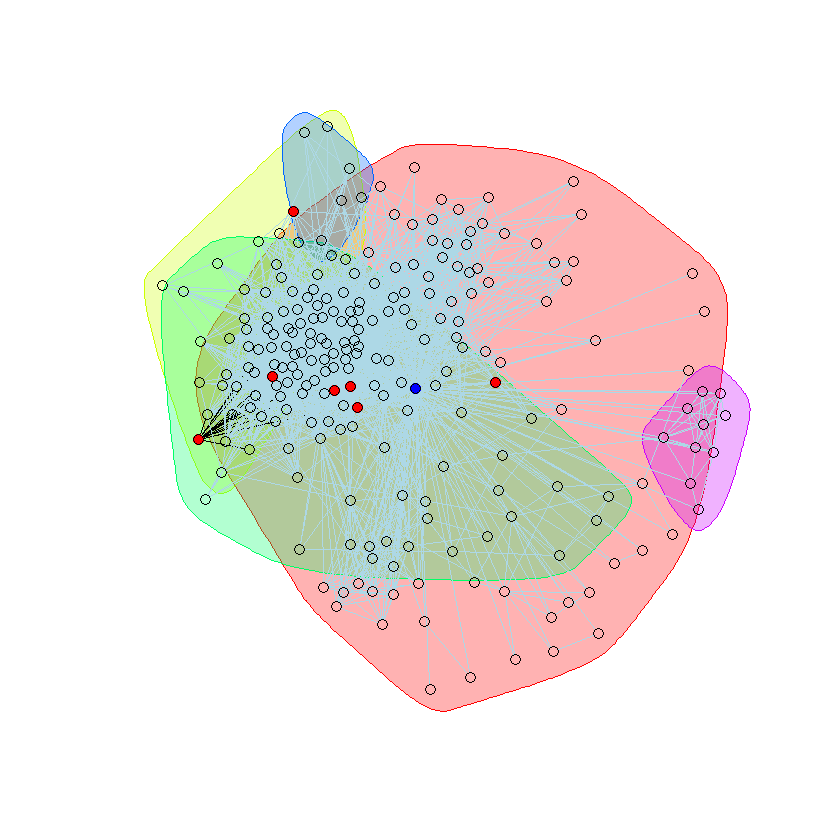

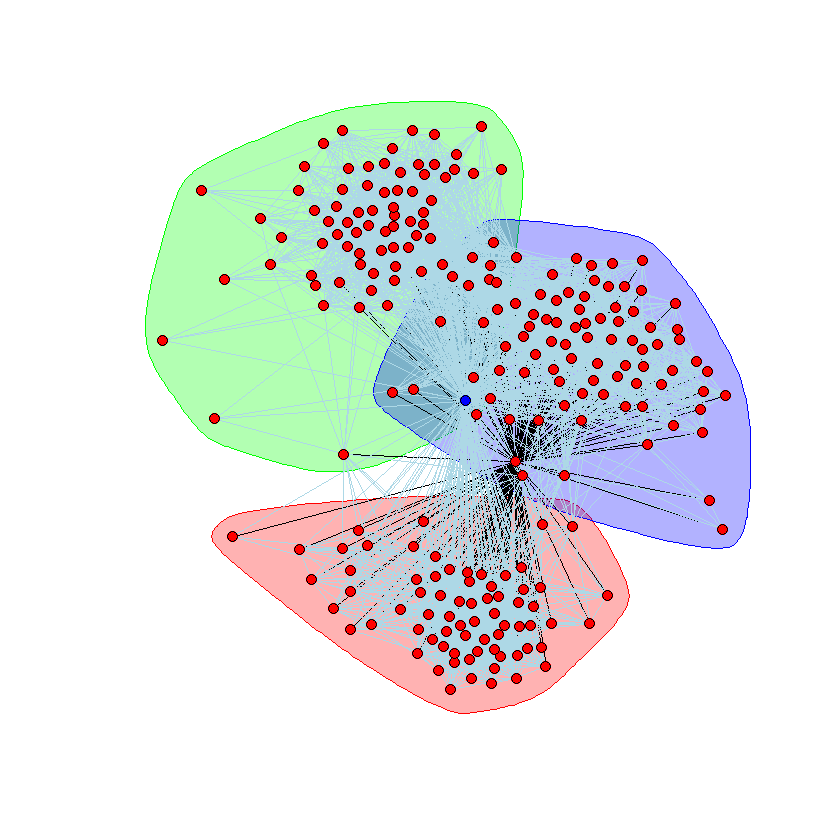

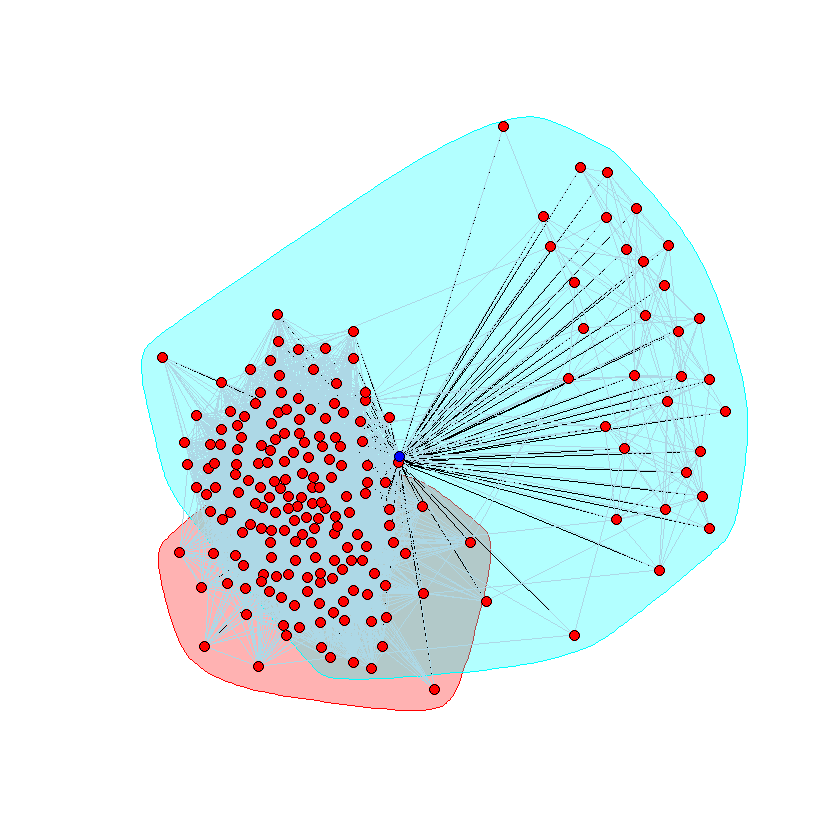

In [35]:
for(i in five_index){
    max_dispersion(g,i)
}


Warning message in vattrs[[name]][index] <- value:
"number of items to replace is not a multiple of replacement length"Warning message in vattrs[[name]][index] <- value:
"number of items to replace is not a multiple of replacement length"Warning message in vattrs[[name]][index] <- value:
"number of items to replace is not a multiple of replacement length"

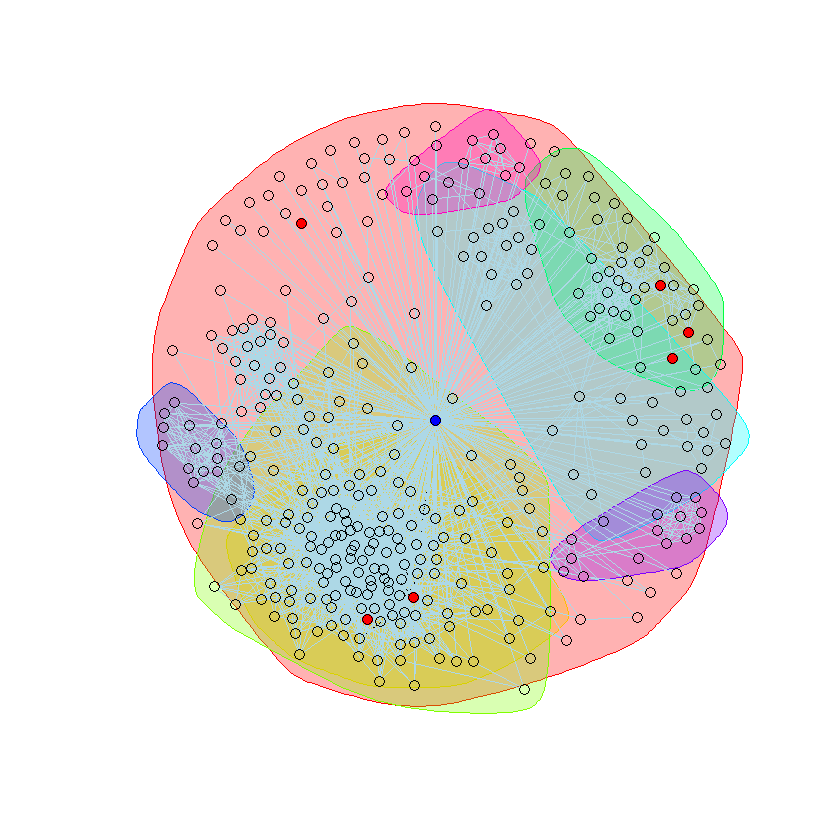

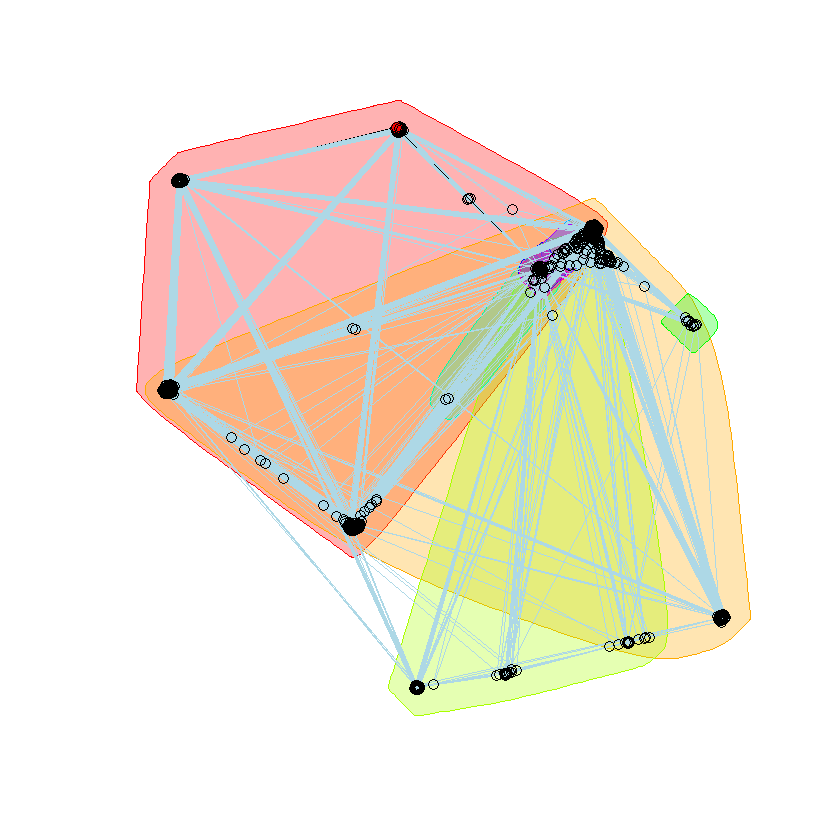

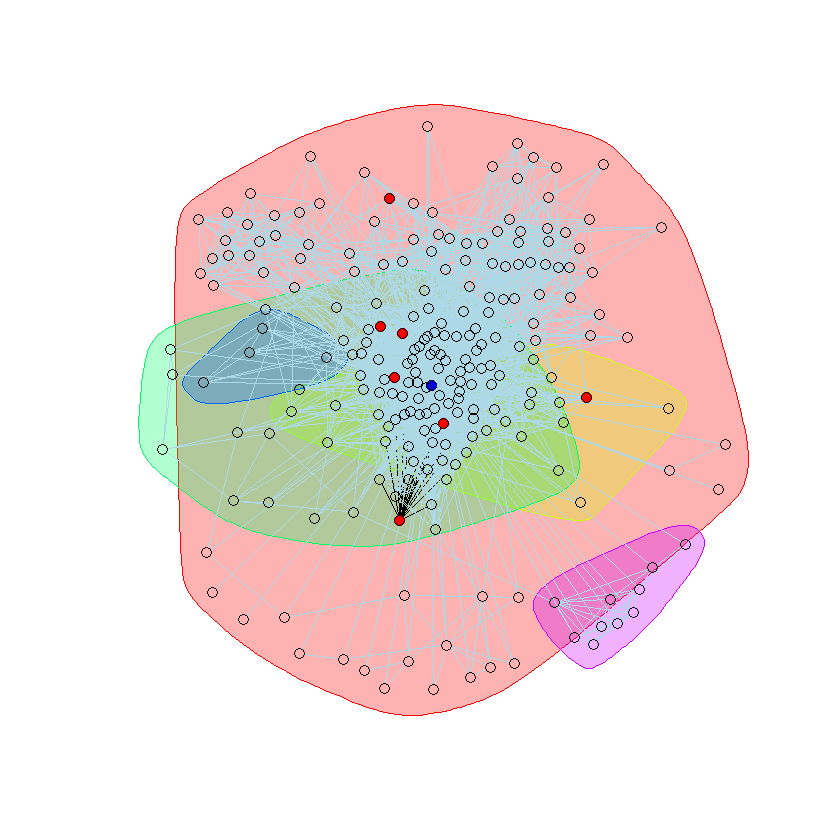

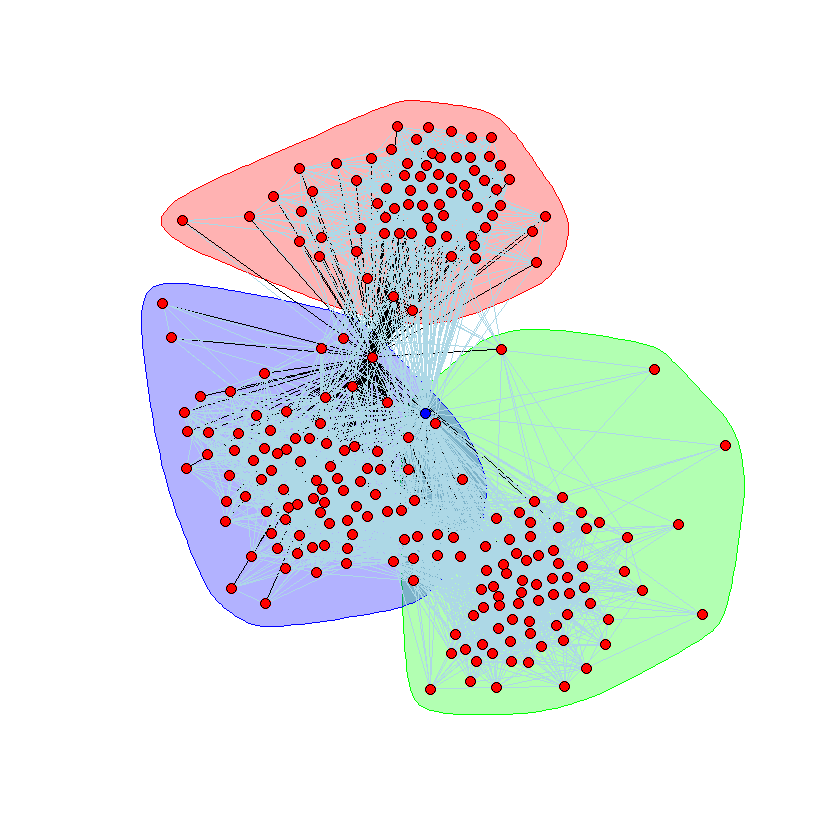

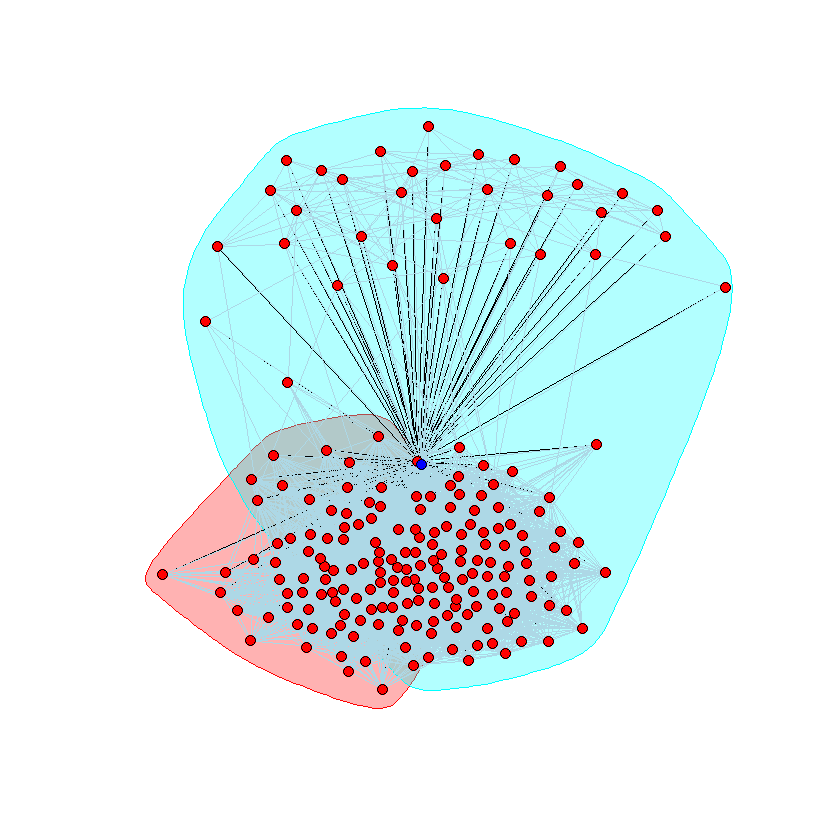

In [37]:
for(i in five_index){
    max_embeddedness(g,i)
}

Warning message in vattrs[[name]][index] <- value:
"number of items to replace is not a multiple of replacement length"Warning message in vattrs[[name]][index] <- value:
"number of items to replace is not a multiple of replacement length"Warning message in vattrs[[name]][index] <- value:
"number of items to replace is not a multiple of replacement length"

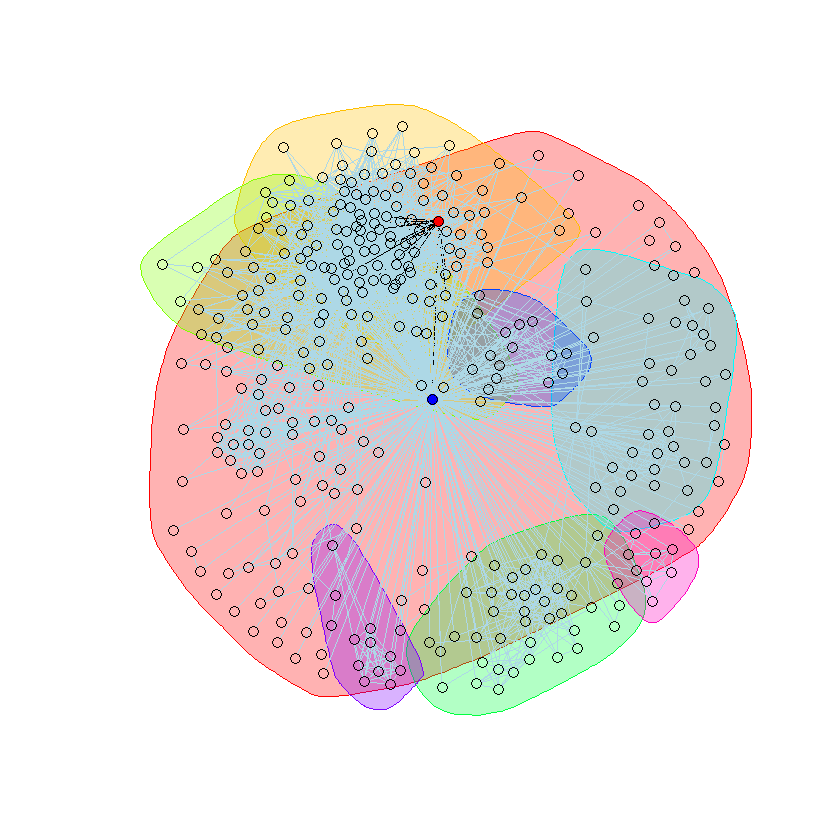

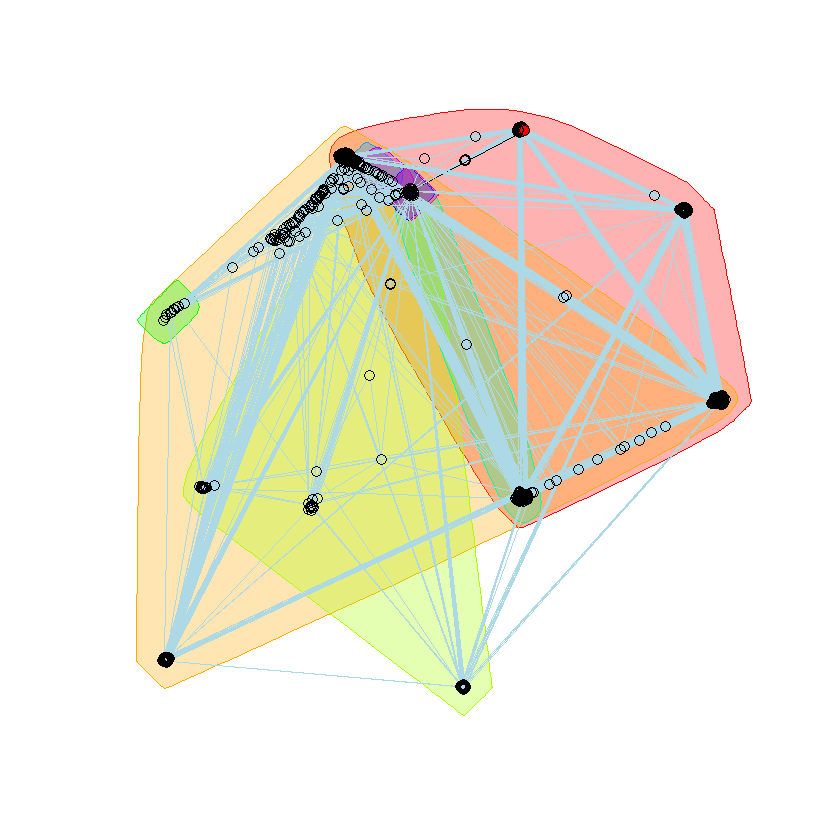

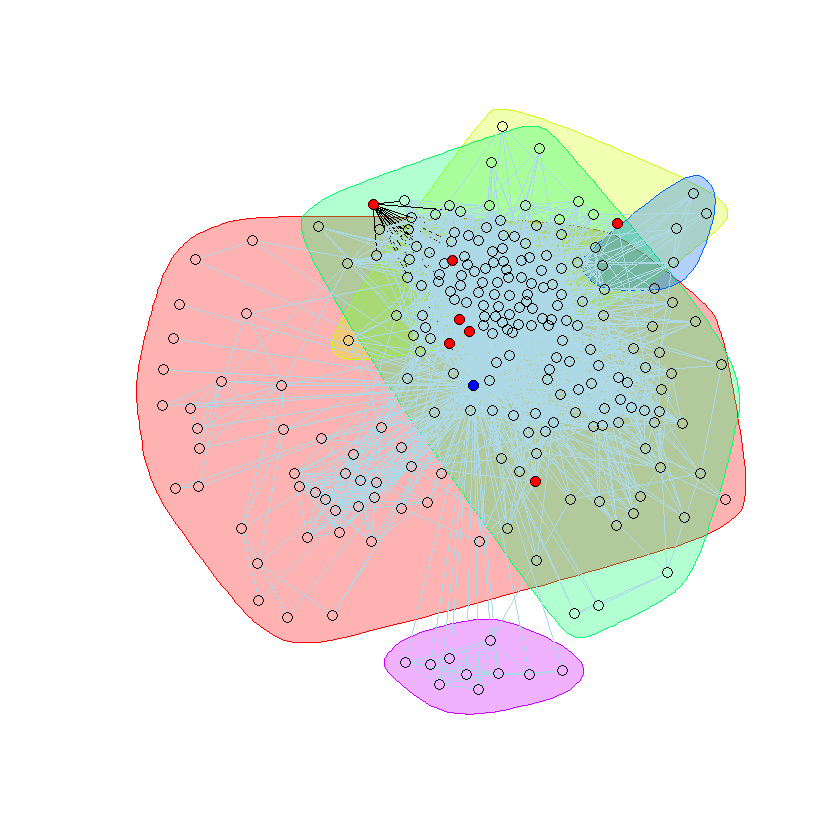

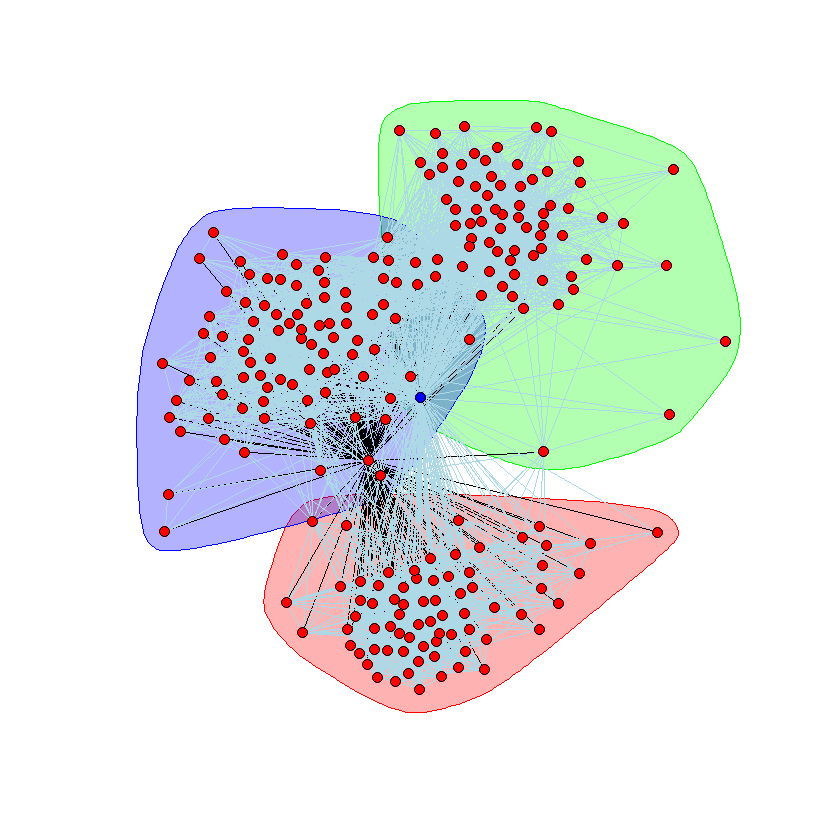

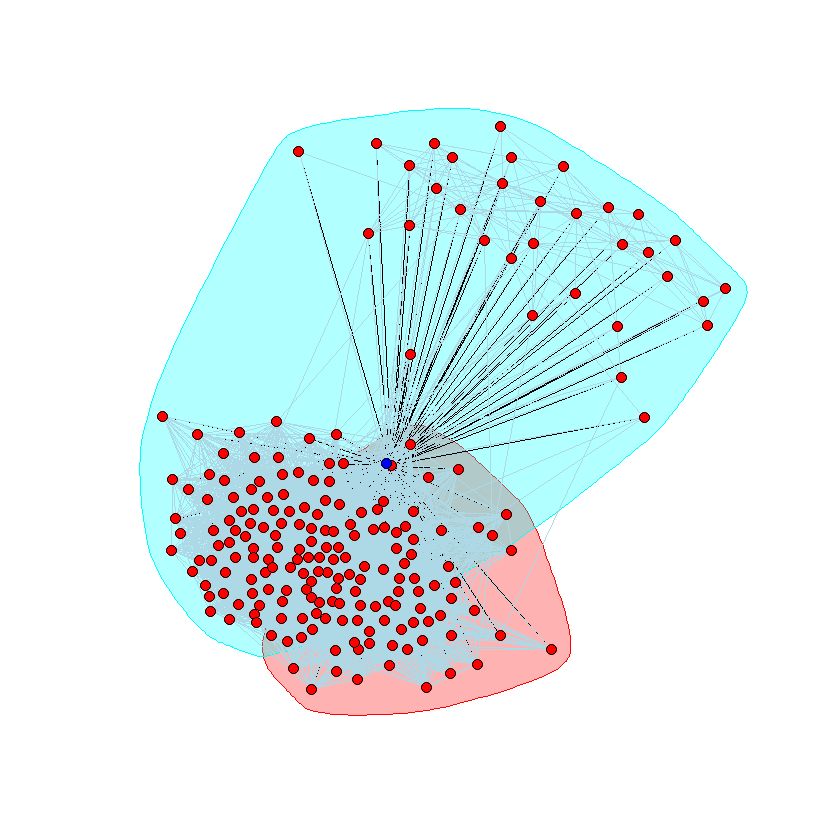

In [36]:
for(i in five_index){
    max_disemb(g,i)
}